# Analysis of Delays In Clinical Trials (ADICT) Project.  

Some background:  
Clinical trials are a type of research that studies new tests and treatments and evaluates their effect on human health outsomes
- test safety and efficacy for new, or old, drugs or medical devices
- Very controlled by ethical regulations.

There are 4 key phases of clinical trials:
- Phase 1: Small group - test for safety and dosage (based on the safety)
- Phase 2: Larger group - test effectiveness and side effects
- Phase 3: Evan larger - Compare with current standard treatment
- Phase 4: After market approval, so when a treatment gets on the market - Monitor long-term safety.
  
  
## Clinical Trial registries

To run a clinical trial, you have to obtain ethics approval. These are provided by a review of an ethics committee, which look at the (inter)national regulations and laws. One of the requirements of doing this is to register trial in a recognized clinical trial registry. These registries are public databases with trial information such as:
- Study purpose: What does this study want to show/investigate, what is the aim/goal
- Design: How is the study designed, What is the intervention (drugs or medical devices), what is the comparison etc.
- Population specifics: Who are included in the study or who can participate? Age limitations, biological sex limitation, specific disease etc...
- Location: Where is the study done? is it in only one location, or multiple locations, and if multiple locations is it only in one country or is it an international study?
- Status of the trial: Is the study completed, did it just start or is the recruitment done and now the analysis needs to be done.
- And much more...  
Clinical trial registries are implemented to promote transparency, accountability and trust. And besides that they can promote recruitment as well, as long as the information in there is understandable for the public.
  

There are many different registries. There are 18 major ones, covering large regions/countries. By far the biggest registry is the registry from the USA (Clinicaltrials.gov), with almost half a million trial registrations. followed by the EU clinical trial register; covers the European Union/European Economic Area, which has almost only 10% of the amount as the clinicaltrials.gov.

## Some more information about clinicaltrials.gov
Clinicaltrials.gov is the most used registry, as visible in the numbers of registred trials, and even lots of European studies are registered there. It is by far the most structured and rich database there is for clincial trials/studies, with an option to see previous entries for the trial (historic data). Some history about clinicaltrials.gov:

Year  | Event/Milestone | Description
-------------------|------------------  | -----------------
1997  | Launch| Established by the U.S. National Library of Medicine (NLM) and the national Institute of Health (NIH) to provide public access to information about clinical trials
2000 | Public availability | The website went live, allowing researchers and the public to search for trials  
2005| FDAAA801 law| The Food and Drug Adminitration Amendments Act required registration and results reporting for certain trials, increasing transparancy
2007|Results database added| Allowed researchers to submit summary results of clinical trials, including safety and efficacy outcomes
2017| Final rule implementated| Clarified registration and reporting requirements under the FDAAA801, expanding compliance and penalties for missing data
2020s| Ongoing updates| The registry continues to expand coverage globally, improve data quality and provide tools for analysis of clincial trial data.




# Get libraries and dataset

In [3]:
!pip install scikit-posthocs

In [4]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import io
from google.colab import files
from sklearn.neighbors import KernelDensity
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from scipy import stats
import scikit_posthocs as sp

#The dataset
For this project an old dataset was used.
The dataset was extracted from Clinicaltrials.gov API on 15. March 2023 with a search query of 101 search terms for 3 specific types of breast cancer.




In [5]:
url = "https://github.com/D-Verschoor/CAS-assignents/blob/main/BC%20trials.csv?raw=true"
df = pd.read_csv(url, sep=";", encoding="ISO-8859-1")
df.head() # Print the first five rows

trialid    secondaryids target_type  \
0  NCT00005908          000149   condition   
1  NCT00005970  NCI-2012-01849   condition   
2  NCT00006228  NCI-2012-01402   condition   
3  NCT00010010   CDR0000068431   condition   
4  NCT00022516   CDR0000068827   condition   

                                         publicTitle  \
0  Primary Chemotherapy With Docetaxel-Capecitabi...   
1  Doxorubicin Hydrochloride, Cyclophosphamide, a...   
2  Trastuzumab and Interleukin-2 in Treating Pati...   
3  Exemestane Plus Goserelin in Treating Premenop...   
4  Low-dose Oral Cyclophosphamide and Methotrexat...   

                                               url  targetSize  \
0  https://clinicaltrials.gov/ct2/show/NCT00005908        30.0   
1  https://clinicaltrials.gov/ct2/show/NCT00005970      3436.0   
2  https://clinicaltrials.gov/ct2/show/NCT00006228        37.0   
3  https://clinicaltrials.gov/ct2/show/NCT00010010         NaN   
4  https://clinicaltrials.gov/ct2/show/NCT00022516      1086.0   

   targetSizeNorm                           primarySponsor  \
0            30.0          National Cancer Institute (NCI)   
1          3436.0          National Cancer Institute (NCI)   
2            37.0          National Cancer Institute (NCI)   
3             0.0                       NYU Langone Health   
4          1086.0  International Breast Cancer Study Group   

                                   secondarySponsors  \
0                                                NaN   
1  Cancer and Leukemia Group B; Eastern Cooperati...   
2                                                NaN   
3                    National Cancer Institute (NCI)   
4                                                NaN   

                                           countries  ... primaryOutcomeCount  \
0                                      United States  ...                 4.0   
1          United States; Canada; South Africa; Peru  ...                 1.0   
2                                      United States  ...                 2.0   
3                                      United States  ...                 NaN   
4  Romania; Belgium; Peru; South Africa; Australi...  ...                 1.0   

  secondaryOutcomeCount armsCount enrollmentCount studyLengthMonths  \
0                   NaN       2.0            30.0              91.0   
1                   1.0       3.0          3436.0             116.0   
2                   2.0       1.0            37.0               NaN   
3                   NaN       NaN             NaN               NaN   
4                   3.0       2.0          1086.0             189.0   

  therapeutic_area                                        OrgFullName  \
0        Neoplasms  ['National Institutes of Health Clinical Cente...   
1        Neoplasms                ['National Cancer Institute (NCI)']   
2        Neoplasms                ['National Cancer Institute (NCI)']   
3        Neoplasms                             ['NYU Langone Health']   
4        Neoplasms        ['International Breast Cancer Study Group']   

      OrgClass               DesignInfo        Group  
0      ['NIH']  Single Group Assignment       HR pos  
1      ['NIH']      Parallel Assignment     HER2 pos  
2      ['NIH']  Single Group Assignment     HER2 pos  
3    ['OTHER']                      NaN       HR pos  
4  ['NETWORK']      Parallel Assignment  Tripple neg  

[5 rows x 49 columns]

In [6]:
df.shape

(2726, 49)

In [7]:
df.columns

Index(['trialid', 'secondaryids', 'target_type', 'publicTitle', 'url',
       'targetSize', 'targetSizeNorm', 'primarySponsor', 'secondarySponsors',
       'countries', 'conditions', 'interventions', 'inclusionCriteriaNorm',
       'exclusionCriteriaNorm', 'primaryOutcome', 'secondaryOutcomes',
       'typeEnrolment', 'ageMin', 'ageMax', 'ageMinNorm', 'ageMaxNorm',
       'genderNorm', 'phaseNorm', 'recruitmentStatusNorm', 'studyTypeNorm',
       'countriesArray', 'Locations', 'StartDate', 'Completion v1',
       'CompletionDate', 'Duration V1', 'Curation com', 'Delay', 'WhyStopped',
       'date_enrolment_iso', 'inclusionCriteriaCount',
       'exclusionCriteriaCount', 'conditionsCount', 'interventionsCount',
       'primaryOutcomeCount', 'secondaryOutcomeCount', 'armsCount',
       'enrollmentCount', 'studyLengthMonths', 'therapeutic_area',
       'OrgFullName', 'OrgClass', 'DesignInfo', 'Group'],
      dtype='object')

The datafile consisted of 2726 trials and 49 variables. The variables used in this dataset are variables that could have an effect on the duration of the clinical trial, such as country, condition, population, drug..


# Data Cleaning
Some data entries were cleaned to ensure the data had the right configuration. For example:
- ['Phase 2'] --> Phase 2
- [NIH']'--> NIH
- Column name typos


In [8]:
df['StartDate'].head()

0    15.06.2000
1    19.05.2000
2    15.07.2000
3    15.06.2000
4    15.11.2000
Name: StartDate, dtype: object

In [9]:
#Set all dates to date format
df['StartDate'] = pd.to_datetime(df['StartDate'], format='%d.%m.%Y', errors='coerce') #Convert column to date
df['Completion v1'] = pd.to_datetime(df['Completion v1'], format='%d.%m.%Y', errors='coerce')
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'], format='%d.%m.%Y', errors='coerce')


In [10]:
df['StartDate'].head()


0   2000-06-15
1   2000-05-19
2   2000-07-15
3   2000-06-15
4   2000-11-15
Name: StartDate, dtype: datetime64[ns]

In [11]:
df.columns

Index(['trialid', 'secondaryids', 'target_type', 'publicTitle', 'url',
       'targetSize', 'targetSizeNorm', 'primarySponsor', 'secondarySponsors',
       'countries', 'conditions', 'interventions', 'inclusionCriteriaNorm',
       'exclusionCriteriaNorm', 'primaryOutcome', 'secondaryOutcomes',
       'typeEnrolment', 'ageMin', 'ageMax', 'ageMinNorm', 'ageMaxNorm',
       'genderNorm', 'phaseNorm', 'recruitmentStatusNorm', 'studyTypeNorm',
       'countriesArray', 'Locations', 'StartDate', 'Completion v1',
       'CompletionDate', 'Duration V1', 'Curation com', 'Delay', 'WhyStopped',
       'date_enrolment_iso', 'inclusionCriteriaCount',
       'exclusionCriteriaCount', 'conditionsCount', 'interventionsCount',
       'primaryOutcomeCount', 'secondaryOutcomeCount', 'armsCount',
       'enrollmentCount', 'studyLengthMonths', 'therapeutic_area',
       'OrgFullName', 'OrgClass', 'DesignInfo', 'Group'],
      dtype='object')

In [12]:
df['OrgClass'].head()

0        ['NIH']
1        ['NIH']
2        ['NIH']
3      ['OTHER']
4    ['NETWORK']
Name: OrgClass, dtype: object

In [13]:
# Clean entries: remove brackets and quotes
df['phaseNorm'] = df['phaseNorm'].astype(str).str.replace(r"[\[\]']", "", regex=True)
df['OrgClass'] = df['OrgClass'].astype(str).str.replace(r"[\[\]']", "", regex=True)


In [14]:
#Rename column typo
df = df.rename(columns={'Curation com': 'Duration'})

In [15]:
# Combine rare OrgClass categories into "Other"
rare_orgs = ['NETWORK', 'NIH', 'OTHER', 'OTHER_GOV', 'FED']
df['OrgClass2'] = df['OrgClass'].replace(rare_orgs, 'Non-industry')

In [16]:
#Clean inputs
df['Group'] = df['Group'].replace({
    'HR pos': 'HR +',
    'Tripple neg': 'Triple −',
    'HER2 pos': 'HER2 +'
})

df['OrgClass2'] = df['OrgClass2'].replace({
    'INDUSTRY': 'Industry'
})


df['phaseNorm'] = df['phaseNorm'].replace({
    'Early Phase 1': 'Phase 1',
    'Phase 1, Phase 2': 'Phase 2',
    'Phase 2, Phase 3': 'Phase 3',
    'Phase 3': 'Phase 3'
})

# Data calculations
As we want to investigate the delay, we need to calculate:
- The estimated duration in months: # of days between completion v1 and Startdate / 30.44 (average number of days per month)
- The actual duration: # of dats between completionDate and StartDate / 30.44 (average number of days per month)

The delay was calculated as:
- Delay in months: Difference between actual and estimated duration
- Delay in %: Delay in months as a proportion of estimated duration.

The delay in % was chosen, as not all studies have the same duration, especially earlier stage trials are often quite short studies (1-2 years) while later stage trials can have duration of 5 years. A delay of 6 months has a different impact on a trial of 1-2 years then on a trial of 5 years.

In [17]:
#Calculate durations

# Calculate estimated duration in months
df['EstimatedDuration'] = (df['Completion v1'] - df['StartDate']).dt.days / 30.44
df['EstimatedDuration'] = df['EstimatedDuration'].round(1)

# Calculate actual duration in months
df['ActualDuration'] = (df['CompletionDate'] - df['StartDate']).dt.days / 30.44
df['ActualDuration'] = df['ActualDuration'].round(1)

# Calculate delay in months
df['DelayCalc'] = df['ActualDuration'] - df['EstimatedDuration']

# Drop rows where DelayCalc is NaN
df = df.dropna(subset=['DelayCalc'])

# Calculate delay as % of estimated duration (avoid division by zero)
df['DelayPerc'] = np.where(
    df['EstimatedDuration'] != 0,
    (df['DelayCalc'] / df['EstimatedDuration']) * 100,
    np.nan
)

# Round to 1 decimal place
df['DelayPerc'] = df['DelayPerc'].round(1)

# Check first rows
df[['EstimatedDuration', 'ActualDuration', 'DelayCalc', 'DelayPerc']].head()


EstimatedDuration  ActualDuration  DelayCalc  DelayPerc
0                70.0            91.0       21.0       30.0
34               13.0            25.0       12.0       92.3
37               47.0           158.0      111.0      236.2
38               26.0            73.0       47.0      180.8
39               96.0           181.6       85.6       89.2

# Filter dataset

While CT.gov was initiated in 2000, it was not mandatory to register a Clincal trial till 2005. In 2005 the ICMJE made a policy that Interventional studies of any intervention type, phase, or geographical location must be registered in ClinicalTrials.gov or other approved registry. No results reporting requirements. Meaning that studies initiated after this date must be registered before first patient enrolled; studies initiated before this date must be retrospectively registered to be considered for publication.

For this reason we only take trials from **2006 and onward.**
Furthermore, as this search was performed on **XX XXX** of 2023, trials from that year were excluded as no hard conclusion can be made for these trials.

Also the dataset has columns we will not use we remove those columns to have a compact dataset

In [18]:
# filter columns to only have useful columns left
trials = df[(df['StartDate'] > '2006-01-01') #Excluce trials befor 2006
]
trials['StartDate'].head()

41   2006-01-15
71   2006-02-15
77   2006-01-15
85   2006-02-15
86   2006-03-15
Name: StartDate, dtype: datetime64[ns]

In [19]:
trials.shape

(2166, 54)

# Descriptive characteristics of Dataset

In [20]:
#Use a colorblind friendly colorpalette

plt.style.use('seaborn-v0_8-colorblind')

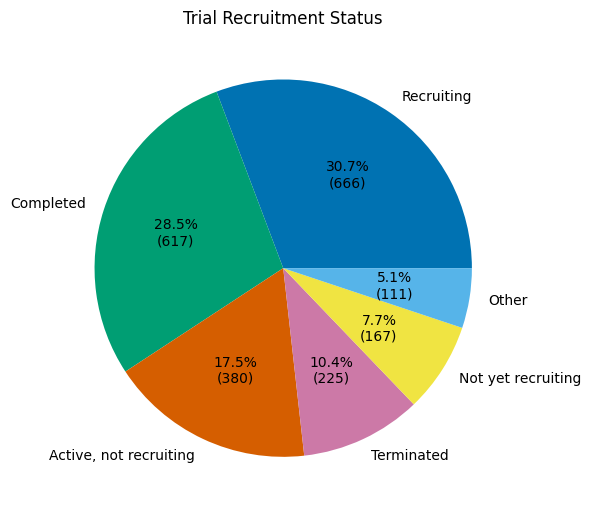

In [21]:
# Make a copy to avoid modifying the original
status_counts = trials['recruitmentStatusNorm'].copy()

# Combine specific categories into 'Other'
status_counts = status_counts.replace(['Withdrawn', 'Suspended', 'Enrolling by invitation'], 'Other')

# Count occurrences
status_counts = status_counts.value_counts()

# Plot pie chart
status_counts.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p * len(trials) / 100)})',
    ylabel='',
    color='pastel2',
    figsize=(6,6),

)

plt.title("Trial Recruitment Status")
plt.tight_layout()

# Save to PNG
file_name = 'recruitement.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()

# Download the file
#files.download(file_name)


In [22]:
trials['CompletionDate_year'] = trials['CompletionDate'].dt.year
#Define variables
categorical_vars = [
    'genderNorm', 'phaseNorm','OrgClass2',
    'DesignInfo', 'Group'
]

numeric_vars = [
    'targetSizeNorm','ageMinNorm', 'ageMaxNorm', 'Duration V1', 'inclusionCriteriaCount',
    'exclusionCriteriaCount', 'conditionsCount', 'interventionsCount',
    'primaryOutcomeCount', 'secondaryOutcomeCount', 'armsCount'
]

# Initialize list for all summary rows
summary_rows = []

# Categorical variables: n (%)
for var in categorical_vars:
    counts = trials[var].value_counts(dropna=False)
    percents = trials[var].value_counts(normalize=True, dropna=False)*100
    for cat in counts.index:
        summary_rows.append({
            'Variable': var,
            'Category': str(cat),
            'Summary': f"{counts[cat]} ({percents[cat]:.1f}%)"
        })

# Numeric variables: range (min-max) [IQR]
for var in numeric_vars:
    col = trials[var].dropna()
    mean_val = col.mean()
    min_val = col.min()
    max_val = col.max()
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    summary_rows.append({
        'Variable': var,
        'Category': '',
        'Summary': f"{mean_val:.2f} ({min_val}-{max_val}) [{q1}-{q3}]"
    })

# Convert to DataFrame
summary_table = pd.DataFrame(summary_rows)

# Display the combined table
pd.set_option('display.max_rows', None)  # show all rows
summary_table


/tmp/ipython-input-2145331766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['CompletionDate_year'] = trials['CompletionDate'].dt.year


Variable                 Category  \
0               genderNorm                      All   
1               genderNorm                   Female   
2               genderNorm                     Male   
3                phaseNorm                  Phase 2   
4                phaseNorm                  Phase 1   
5                phaseNorm                  Phase 3   
6                phaseNorm           Not Applicable   
7                phaseNorm                  Phase 4   
8                OrgClass2             Non-industry   
9                OrgClass2                 Industry   
10              DesignInfo  Single Group Assignment   
11              DesignInfo      Parallel Assignment   
12              DesignInfo    Sequential Assignment   
13              DesignInfo     Crossover Assignment   
14              DesignInfo                      nan   
15              DesignInfo     Factorial Assignment   
16                   Group                 Triple −   
17                   Group                     HR +   
18                   Group                   HER2 +   
19          targetSizeNorm                            
20              ageMinNorm                            
21              ageMaxNorm                            
22             Duration V1                            
23  inclusionCriteriaCount                            
24  exclusionCriteriaCount                            
25         conditionsCount                            
26      interventionsCount                            
27     primaryOutcomeCount                            
28   secondaryOutcomeCount                            
29               armsCount                            

                             Summary  
0                       1094 (50.5%)  
1                       1065 (49.2%)  
2                           7 (0.3%)  
3                       1227 (56.6%)  
4                        510 (23.5%)  
5                        243 (11.2%)  
6                         151 (7.0%)  
7                          35 (1.6%)  
8                       1336 (61.7%)  
9                        830 (38.3%)  
10                      1002 (46.3%)  
11                       901 (41.6%)  
12                       221 (10.2%)  
13                         17 (0.8%)  
14                         15 (0.7%)  
15                         10 (0.5%)  
16                       831 (38.4%)  
17                       730 (33.7%)  
18                       605 (27.9%)  
19  153.36 (0.0-5000.0) [30.0-159.0]  
20      18.57 (0.0-70.0) [18.0-18.0]  
21  95.13 (35.0-150.0) [100.0-100.0]  
22     35.74 (0.0-203.0) [22.0-43.0]  
23       13.83 (2.0-66.0) [7.0-18.0]  
24       14.33 (0.0-90.0) [7.0-19.0]  
25        3.23 (1.0-130.0) [1.0-3.0]  
26         2.68 (1.0-28.0) [1.0-3.0]  
27         1.81 (1.0-48.0) [1.0-2.0]  
28         6.47 (1.0-42.0) [3.0-8.0]  
29         2.27 (1.0-29.0) [1.0-2.0]

In [23]:
#file_name = "trials_summary_combined.xlsx"
#summary_table.to_excel(file_name, index=False)
#files.download(file_name)

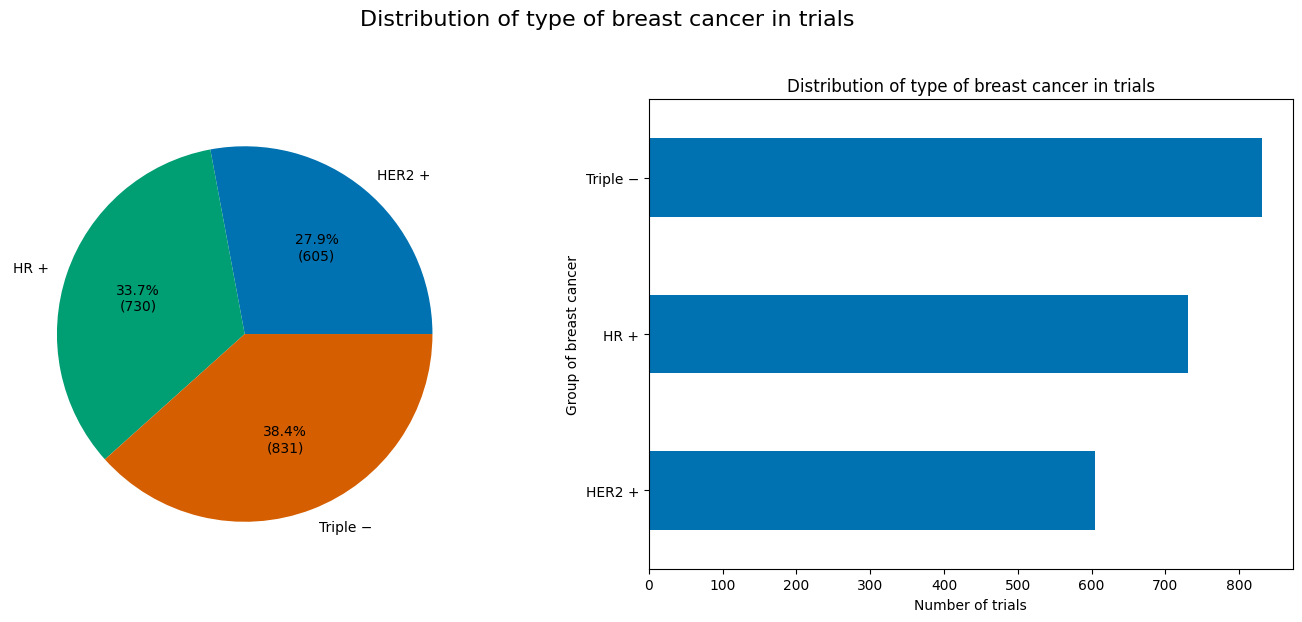

In [24]:
# Prepare figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns


# Pie chart of the group of BC distribution
trials.groupby('Group').size().plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p * trials.shape[0] / 100)})',
    ylabel="",
    ax=axes[0]
)


# Example: count of trials per group
group_counts = trials['Group'].value_counts()
group_percent = 100 * group_counts / group_counts.sum()


# Barplot of the gender distribution
trials.groupby('Group').size().plot(kind='barh' ,
                                    xlabel="Number of trials",
                                    ylabel="Group of breast cancer",
                                    title="Distribution of type of breast cancer in trials",
                                    ax=axes[1]  # Draw on second subplot
                                    )
# Add a main title for the whole figure
fig.suptitle("Distribution of type of breast cancer in trials", fontsize=16, y=1.03)

plt.tight_layout()  # Adjust spacing so titles/labels don't overlap

# Save to PNG
file_name = 'groups.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()

# Download the file
#files.download(file_name)


In [25]:
years = trials['StartDate'].dt.year.dropna()

# Get min and max year
min_year = int(years.min())
max_year = int(years.max())

print(f"Minimum year: {min_year}")
print(f"Maximum year: {max_year}")

Minimum year: 2006
Maximum year: 2024


/tmp/ipython-input-1636937309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['StartYear'] = trials['StartDate'].dt.year


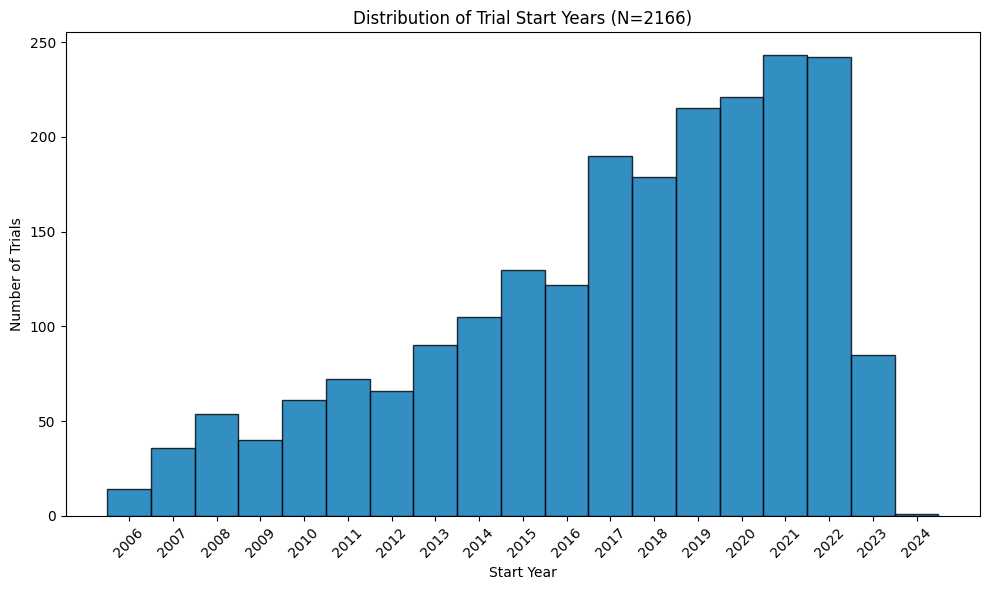

In [26]:
# Extract the year
trials['StartYear'] = trials['StartDate'].dt.year

# Drop missing years
years = trials['StartYear'].dropna()

# Define bins for full years
bins = range(int(years.min()), int(years.max()) + 2)

# Create histogram and capture bin_edges
plt.figure(figsize=(10, 6))
counts, bin_edges, patches = plt.hist(
    years,
    bins=bins,
    edgecolor='black',
    alpha=0.8
)

# Compute bin centers (for centered ticks)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Use bin centers as tick positions and label them with the corresponding years
plt.xticks(bin_centers, [str(int(x)) for x in bin_centers], rotation=45)

# Labels and title
total_n = len(years)
plt.xlabel('Start Year')
plt.ylabel('Number of Trials')
plt.title(f'Distribution of Trial Start Years (N={total_n})')

plt.tight_layout()

# Save to PNG
file_name = 'Start year.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()

# Download the file
#files.download(file_name)

# Filter only on completed trials

In [27]:
#Filter dataset
comp_trials = trials[
    (trials['recruitmentStatusNorm'] == 'Completed')
]

In [28]:
comp_trials.shape

(617, 56)

# Plot planned and actual duration
'StartDate' = Starting date  
'Completion v1' = First entry of completion date  
'CompletionDate' = Latest entry of completion date  
'Duration V1' = Expected duration  
'Duration' = Actual duration  
'Delay' = Calculated delay  

In [29]:
#Describe the Estimated duration, actual duration
comp_trials[['EstimatedDuration', 'ActualDuration',	'DelayCalc', 'DelayPerc']].describe()

EstimatedDuration  ActualDuration   DelayCalc    DelayPerc
count         617.000000      617.000000  617.000000   617.000000
mean           35.976985       52.243112   16.266126    65.553323
std            22.458923       27.431072   29.703065   406.434710
min            -4.400000        1.300000 -174.600000 -9125.000000
25%            22.700000       34.000000    0.000000     0.000000
50%            32.000000       47.100000   12.900000    39.600000
75%            43.000000       66.500000   31.000000   114.800000
max           203.200000      178.500000  155.200000  1500.000000

In [30]:
# Ensure no division by zero
comp_trials['DelayPerc'] = (comp_trials['DelayCalc'] / comp_trials['EstimatedDuration']) * 100

# Optional: round to 1 decimal place
comp_trials['DelayPerc'] = comp_trials['DelayPerc'].round(1)

comp_trials[['DelayCalc', 'EstimatedDuration', 'DelayPerc']].head()


/tmp/ipython-input-1469869455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_trials['DelayPerc'] = (comp_trials['DelayCalc'] / comp_trials['EstimatedDuration']) * 100
/tmp/ipython-input-1469869455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_trials['DelayPerc'] = comp_trials['DelayPerc'].round(1)


DelayCalc  EstimatedDuration  DelayPerc
41      109.1               24.0      454.6
71       12.0               28.9       41.5
77        6.0               35.0       17.1
85       -4.9               40.9      -12.0
86       30.1               41.0       73.4

In [31]:
comp_trials.shape

(617, 56)

In [32]:
# Show the 10 lowest values of DelayPerc
lowest_10 = comp_trials[['DelayPerc']].nsmallest(10, 'DelayPerc')
print(lowest_10)

      DelayPerc
1330    -9125.0
602     -1509.1
534       -88.2
1956      -85.9
347       -84.6
965       -79.8
1133      -77.6
1355      -76.7
2035      -71.7
790       -69.3


In [33]:
# Show the 10 largest values of DelayCalc
largest_10 = comp_trials[['DelayPerc']].nlargest(10, 'DelayPerc')
print(largest_10)

      DelayPerc
2289     1500.0
125      1177.6
126      1177.6
219      1175.8
856      1018.8
380       741.2
1073      685.0
193       683.3
208       625.0
628       487.5


In [34]:
# Show the 10 lowest values of DelayCalc
lowest_10 = comp_trials[['DelayCalc']].nsmallest(10, 'DelayCalc')
print(lowest_10)

      DelayCalc
1956     -174.6
1406      -74.8
1407      -74.8
790       -71.4
1355      -69.0
965       -67.0
382       -50.0
1553      -49.0
741       -48.7
1206      -48.5


In [35]:
# Show the 10 largest values of DelayCalc
largest_10 = comp_trials[['DelayCalc']].nlargest(10, 'DelayCalc')
print(largest_10)

     DelayCalc
219      155.2
125      147.2
126      147.2
158      142.5
380      126.0
165      118.2
166      118.2
41       109.1
149       96.4
586       94.6


In [36]:
#Filter dataset
comp_trials = comp_trials[
    (comp_trials['DelayPerc'] > -1000)&
    (comp_trials['DelayPerc'] < 1000)&
    (comp_trials['DelayCalc'] > -100)
]

In [37]:
#Describe the Estimated duration, actual duration
comp_trials[['EstimatedDuration', 'ActualDuration',	'DelayCalc', 'DelayPerc']].describe()

EstimatedDuration  ActualDuration   DelayCalc   DelayPerc
count         609.000000      609.000000  609.000000  609.000000
mean           36.047455       51.765517   15.718062   74.083087
std            21.310501       26.352825   27.082965  115.217335
min             1.000000        1.300000  -74.800000  -88.200000
25%            23.000000       34.000000    0.000000    0.000000
50%            32.100000       47.000000   12.200000   39.300000
75%            43.000000       66.300000   30.000000  114.300000
max           153.300000      178.500000  142.500000  741.200000

# plots


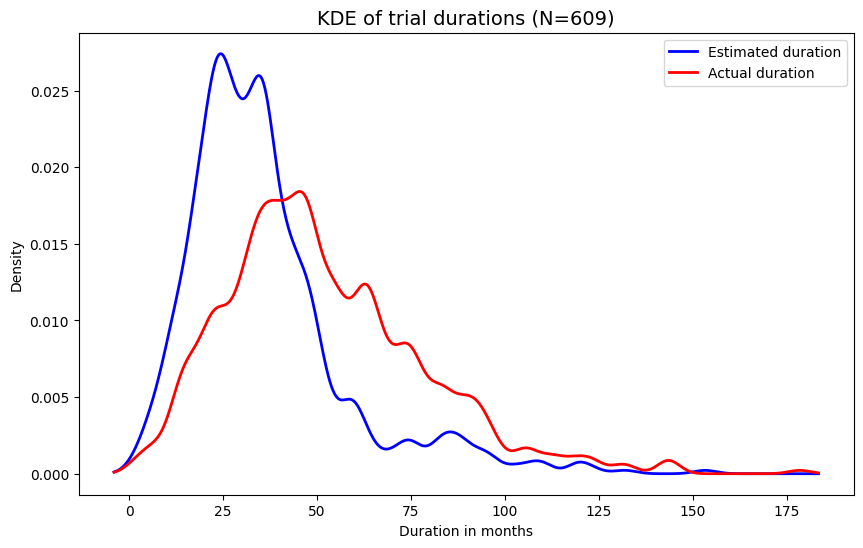

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
# plot range
duration_range = np.linspace(
    min(comp_trials['EstimatedDuration'].min(), comp_trials['ActualDuration'].min()) - 5,
    max(comp_trials['EstimatedDuration'].max(), comp_trials['ActualDuration'].max()) + 5,
    1000
).reshape(-1, 1)

# fit Estimated Duration
kde_est = KernelDensity(bandwidth=3.0, kernel='gaussian')
kde_est.fit(comp_trials['EstimatedDuration'].values.reshape(-1, 1))
log_density_est = kde_est.score_samples(duration_range)
density_est = np.exp(log_density_est)

# fit actual duration
kde_act = KernelDensity(bandwidth=3.0, kernel='gaussian')
kde_act.fit(comp_trials['ActualDuration'].values.reshape(-1, 1))
log_density_act = kde_act.score_samples(duration_range)
density_act = np.exp(log_density_act)

# Plot both KDE curves on the same plot
plt.figure(figsize=(10, 6))
plt.plot(duration_range, density_est, label='Estimated duration', color='blue', linewidth=2)
plt.plot(duration_range, density_act, label='Actual duration', color='red', linewidth=2)

plt.title(f'KDE of trial durations (N={len(comp_trials)})', fontsize=14)
plt.xlabel('Duration in months')
plt.ylabel('Density')
plt.legend()

# Save to PNG
file_name = 'KDE duration.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()

# Download the file
files.download(file_name)




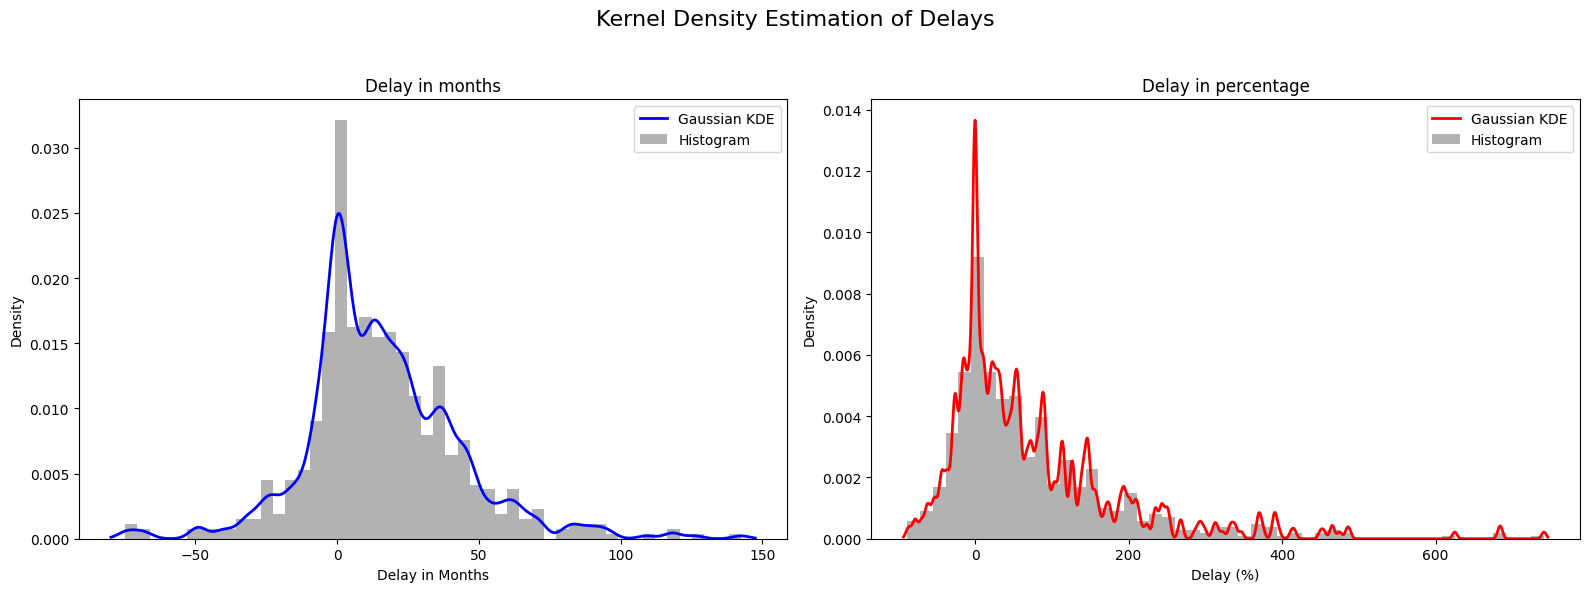

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
#Prepare data
delay_data_calc = comp_trials['DelayCalc'].dropna().values.reshape(-1, 1)
delay_data_perc = comp_trials['DelayPerc'].dropna().values.reshape(-1, 1)

# Create figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot DelayCalc ---
kde_calc = KernelDensity(bandwidth=3.0, kernel='gaussian')
kde_calc.fit(delay_data_calc)
range_calc = np.linspace(delay_data_calc.min()-5, delay_data_calc.max()+5, 1000).reshape(-1,1)
density_calc = np.exp(kde_calc.score_samples(range_calc))

axes[0].plot(range_calc, density_calc, color='blue', linewidth=2, label='Gaussian KDE')
axes[0].hist(delay_data_calc, density=True, bins=50, alpha=0.6, color='grey', label='Histogram')
axes[0].set_title('Delay in months')
axes[0].set_xlabel('Delay in Months')
axes[0].set_ylabel('Density')
axes[0].legend()

# --- Plot DelayPerc ---
kde_perc = KernelDensity(bandwidth=3.0, kernel='gaussian')
kde_perc.fit(delay_data_perc)
range_perc = np.linspace(delay_data_perc.min()-5, delay_data_perc.max()+5, 1000).reshape(-1,1)
density_perc = np.exp(kde_perc.score_samples(range_perc))

axes[1].plot(range_perc, density_perc, color='red', linewidth=2, label='Gaussian KDE')
axes[1].hist(delay_data_perc, density=True, bins=50, alpha=0.6, color='grey', label='Histogram')
axes[1].set_title('Delay in percentage')
axes[1].set_xlabel('Delay (%)')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.suptitle('Kernel Density Estimation of Delays', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save to PNG
file_name = 'Gaussion delay.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

plt.show()

# Download the file
files.download(file_name)



# Module 3: Machine learning
For this project we will do some:
1. Supervised regression
2. Classification
3. Some exploratory unsupervised learning



# Load libraries

In [40]:
# Machine learning libraries

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn import utils
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score, classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBRegressor


# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np
import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML


# Linear regression
One theory you could have is that the longer the trial duration, the bigger the risk of delays. Because it is running longer, more time to accumulate delay...
Let's test that

In [55]:
comp_trials.shape

(609, 57)

In [41]:
def plot_regression(ax, x, y, xlabel, ylabel, title):
    # Linear regression
    reg = LinearRegression()
    reg.fit(x, y)
    y_pred = reg.predict(x)

    # Scatter + regression line
    ax.scatter(x, y, marker='*', alpha=0.7, label='Data points')
    ax.plot(x, y_pred, c='red', linewidth=2, label='Regression line')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    # Return ALL 5 values
    return reg.coef_[0], reg.intercept_, mse, rmse, r2


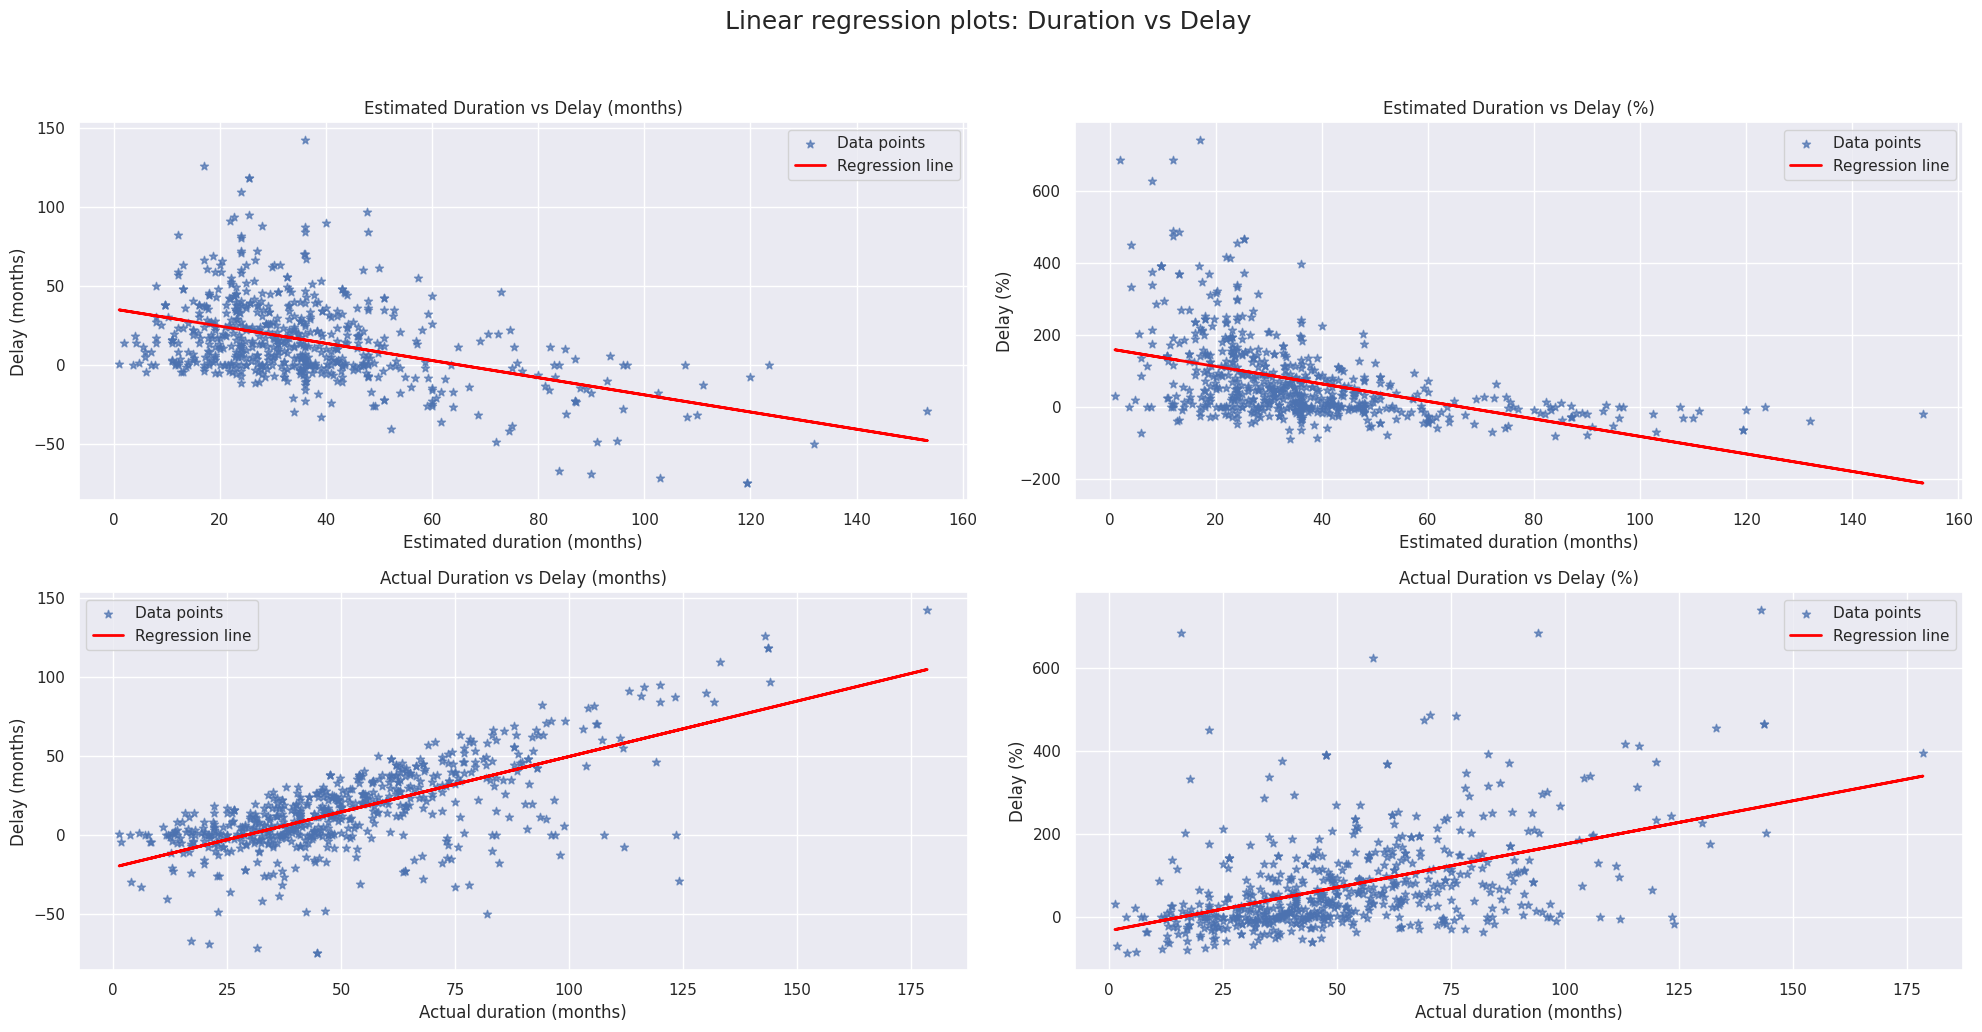

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== Regression Coefficients + Metrics ===

1️⃣ Estimated duration → Delay (months):
   slope = -0.5430, intercept = 35.2902
   MSE = 598.6223, RMSE = 24.4668, R² = 0.1825

2️⃣ Actual duration → Delay (months):
   slope = 0.7011, intercept = -20.5760
   MSE = 391.4586, RMSE = 19.7853, R² = 0.4654

3️⃣ Estimated duration → Delay (%):
   slope = -2.4234, intercept = 161.4409
   MSE = 10590.4994, RMSE = 102.9102, R² = 0.2009

4️⃣ Actual duration → Delay (%):
   slope = 2.0910, intercept = -34.1604
   MSE = 10221.6982, RMSE = 101.1024, R² = 0.2287


In [42]:
# Create figure with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

x_est  = comp_trials['EstimatedDuration'].values.reshape(-1, 1)
x_act  = comp_trials['ActualDuration'].values.reshape(-1, 1)
y_delay = comp_trials['DelayCalc'].values
y_delayperc = comp_trials['DelayPerc'].values

def plot_regression(ax, x, y, xlabel, ylabel, title):
    # Linear regression
    reg = LinearRegression()
    reg.fit(x, y)
    y_pred = reg.predict(x)

    # Scatter + regression line
    ax.scatter(x, y, marker='*', alpha=0.7, label='Data points')
    ax.plot(x, y_pred, c='red', linewidth=2, label='Regression line')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    # Return slope + intercept for printing
    return reg.coef_[0], reg.intercept_, mse, rmse, r2


# Top left: Estimated duration vs delay months
slope1, intercept1, mse1, rmse1, r2_1 = plot_regression(
    axes[0,0], x_est, y_delay,
    "Estimated duration (months)", "Delay (months)",
    "Estimated Duration vs Delay (months)"
)

# Bottom left: Actual duration vs delay months
slope2, intercept2, mse2, rmse2, r2_2 = plot_regression(
    axes[1,0], x_act, y_delay,
    "Actual duration (months)", "Delay (months)",
    "Actual Duration vs Delay (months)"
)

# Top right: Estimated duration vs delay %
slope3, intercept3, mse3, rmse3, r2_3 = plot_regression(
    axes[0,1], x_est, y_delayperc,
    "Estimated duration (months)", "Delay (%)",
    "Estimated Duration vs Delay (%)"
)

# Bottom right: Actual duration vs delay %
slope4, intercept4, mse4, rmse4, r2_4 = plot_regression(
    axes[1,1], x_act, y_delayperc,
    "Actual duration (months)", "Delay (%)",
    "Actual Duration vs Delay (%)"
)

# Add main title
fig.suptitle("Linear regression plots: Duration vs Delay ", fontsize=18, y=1.03)

plt.tight_layout()

# Save to PNG
file_name = 'Linear regression plots Duration vs Delay.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

# Download the file
files.download(file_name)

# ---- PRINT METRICS ----
print("\n=== Regression Coefficients + Metrics ===")

print(f"\n1️⃣ Estimated duration → Delay (months):")
print(f"   slope = {slope1:.4f}, intercept = {intercept1:.4f}")
print(f"   MSE = {mse1:.4f}, RMSE = {rmse1:.4f}, R² = {r2_1:.4f}")

print(f"\n2️⃣ Actual duration → Delay (months):")
print(f"   slope = {slope2:.4f}, intercept = {intercept2:.4f}")
print(f"   MSE = {mse2:.4f}, RMSE = {rmse2:.4f}, R² = {r2_2:.4f}")

print(f"\n3️⃣ Estimated duration → Delay (%):")
print(f"   slope = {slope3:.4f}, intercept = {intercept3:.4f}")
print(f"   MSE = {mse3:.4f}, RMSE = {rmse3:.4f}, R² = {r2_3:.4f}")

print(f"\n4️⃣ Actual duration → Delay (%):")
print(f"   slope = {slope4:.4f}, intercept = {intercept4:.4f}")
print(f"   MSE = {mse4:.4f}, RMSE = {rmse4:.4f}, R² = {r2_4:.4f}")

# Random forest


In [43]:
comp_trials.columns

Index(['trialid', 'secondaryids', 'target_type', 'publicTitle', 'url',
       'targetSize', 'targetSizeNorm', 'primarySponsor', 'secondarySponsors',
       'countries', 'conditions', 'interventions', 'inclusionCriteriaNorm',
       'exclusionCriteriaNorm', 'primaryOutcome', 'secondaryOutcomes',
       'typeEnrolment', 'ageMin', 'ageMax', 'ageMinNorm', 'ageMaxNorm',
       'genderNorm', 'phaseNorm', 'recruitmentStatusNorm', 'studyTypeNorm',
       'countriesArray', 'Locations', 'StartDate', 'Completion v1',
       'CompletionDate', 'Duration V1', 'Duration', 'Delay', 'WhyStopped',
       'date_enrolment_iso', 'inclusionCriteriaCount',
       'exclusionCriteriaCount', 'conditionsCount', 'interventionsCount',
       'primaryOutcomeCount', 'secondaryOutcomeCount', 'armsCount',
       'enrollmentCount', 'studyLengthMonths', 'therapeutic_area',
       'OrgFullName', 'OrgClass', 'DesignInfo', 'Group', 'OrgClass2',
       'EstimatedDuration', 'ActualDuration', 'DelayCalc', 'DelayPerc',
       

In [44]:
#comp_trials.head()

In [45]:
features_categorical = [
    'genderNorm', 'phaseNorm','OrgClass2',
    'DesignInfo', 'Group'
    ]

features_numerical =  [
    'targetSizeNorm','ageMinNorm', 'ageMaxNorm', 'inclusionCriteriaCount',
    'exclusionCriteriaCount', 'conditionsCount', 'interventionsCount',
    'primaryOutcomeCount', 'secondaryOutcomeCount', 'armsCount',
    'ActualDuration', 'enrollmentCount'
    ]

## RF with only numerical features


### Delay in months

RF Regression: RMSE = 26.70, R² = -0.10


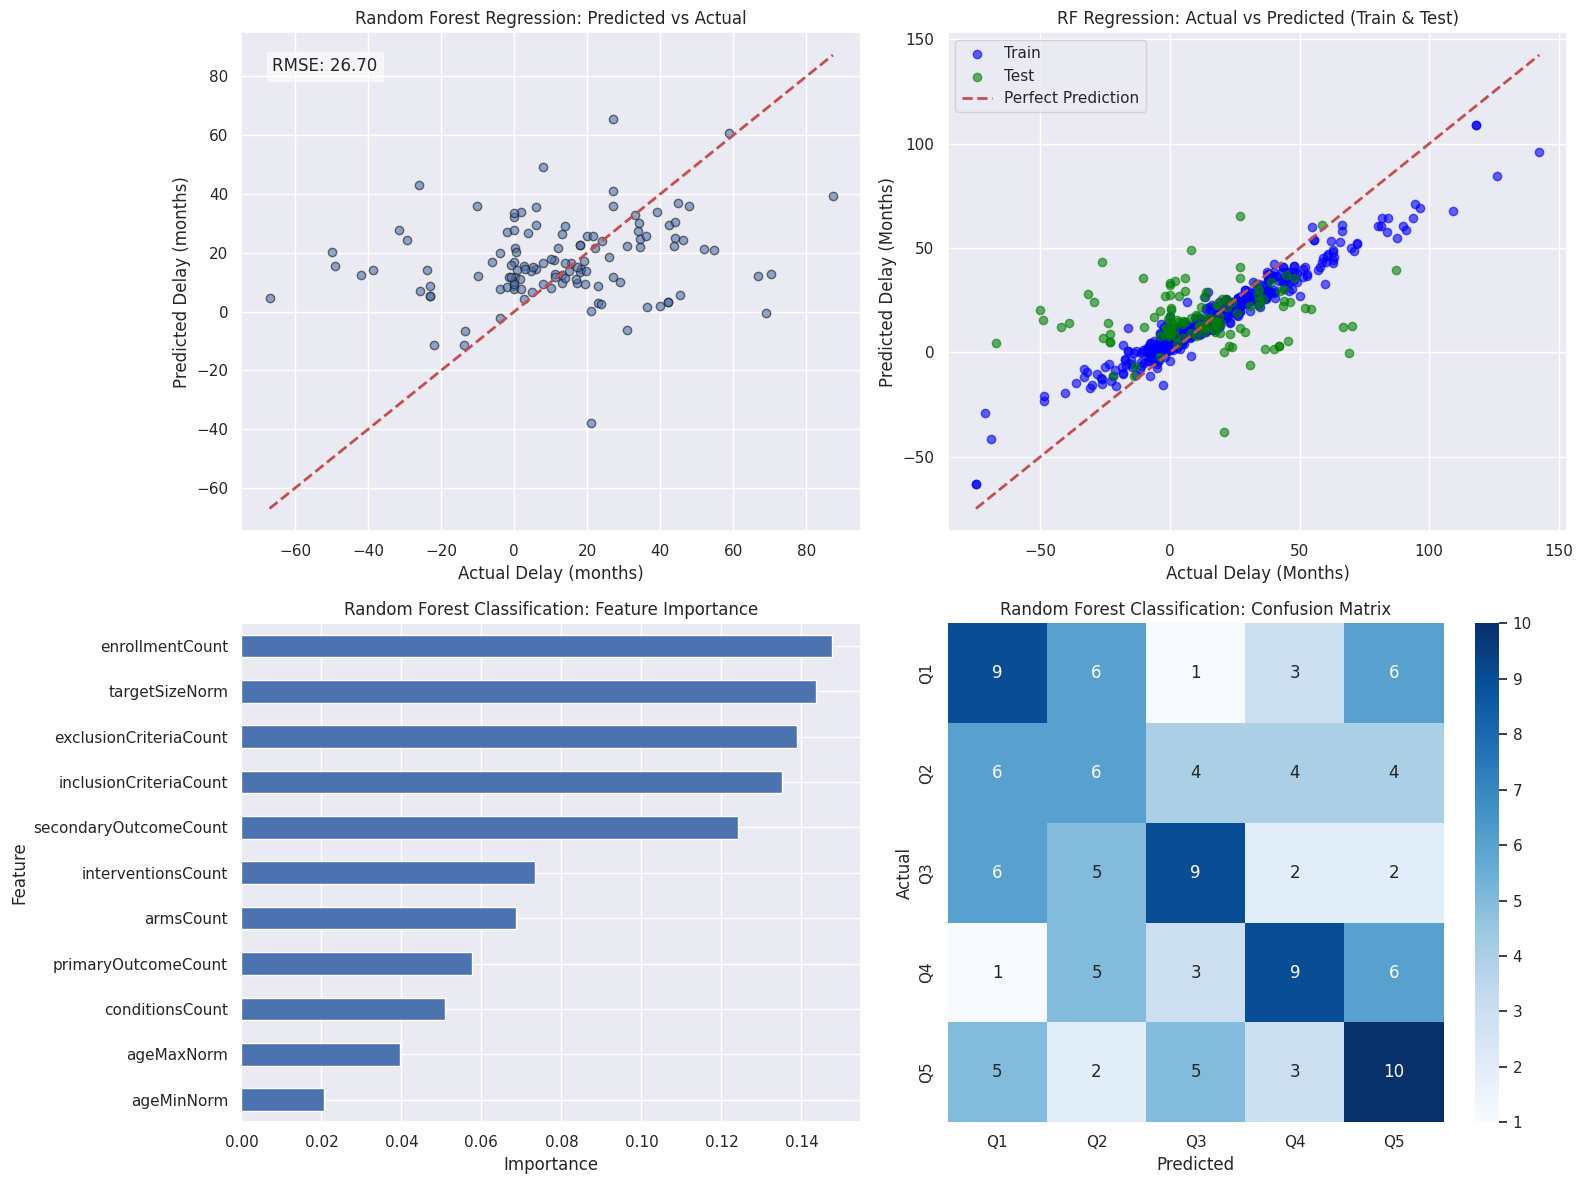

Classification Report:

              precision    recall  f1-score   support

          Q1       0.33      0.36      0.35        25
          Q2       0.25      0.25      0.25        24
          Q3       0.41      0.38      0.39        24
          Q4       0.43      0.38      0.40        24
          Q5       0.36      0.40      0.38        25

    accuracy                           0.35       122
   macro avg       0.36      0.35      0.35       122
weighted avg       0.36      0.35      0.35       122



In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

# -----------------------------
# Features and target
# -----------------------------
features_categorical = [
    'genderNorm', 'phaseNorm','OrgClass2',
    'DesignInfo', 'Group'
]

features_numerical = [
    'targetSizeNorm','ageMinNorm', 'ageMaxNorm', 'inclusionCriteriaCount',
    'exclusionCriteriaCount', 'conditionsCount', 'interventionsCount',
    'primaryOutcomeCount', 'secondaryOutcomeCount', 'armsCount',
    'enrollmentCount'
]

# -----------------------------
# Create regression target
# -----------------------------
comp_trials['DelayCalc'] = comp_trials['ActualDuration'] - comp_trials['EstimatedDuration']
y_reg = comp_trials['DelayCalc']

# -----------------------------
# Create classification target using quantiles
# -----------------------------
n_classes = 5  # number of categories
quantiles = np.linspace(0, 1, n_classes + 1)
bin_edges = comp_trials['DelayCalc'].quantile(quantiles).values
# Ensure unique edges to avoid issues
bin_edges = np.unique(bin_edges)
labels = [f'Q{i+1}' for i in range(len(bin_edges)-1)]
comp_trials['DelayPattern'] = pd.cut(comp_trials['DelayCalc'], bins=bin_edges, labels=labels, include_lowest=True)
y_clf = comp_trials['DelayPattern']

# -----------------------------
# Prepare numerical features
# -----------------------------
X = comp_trials[features_numerical].fillna(0)

# -----------------------------
# Train/test split
# -----------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# -----------------------------
# Scale features (optional for RF)
# -----------------------------
scaler = StandardScaler()
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

# -----------------------------
# Random Forest Regression
# -----------------------------
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_r_scaled, y_train_r)
y_pred_r = rf_reg.predict(X_test_r_scaled)
y_train_pred = rf_reg.predict(X_train_r_scaled)

# Evaluate regression
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
r2 = rf_reg.score(X_test_r_scaled, y_test_r)
print(f"RF Regression: RMSE = {rmse:.2f}, R² = {r2:.2f}")

# -----------------------------
# Random Forest Classification
# -----------------------------
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_c_scaled, y_train_c)
y_pred_c = rf_clf.predict(X_test_c_scaled)

# Feature importance
feat_importances = pd.Series(rf_clf.feature_importances_, index=features_numerical).sort_values()

# -----------------------------
# Create combined figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Regression predicted vs actual
axes[0,0].scatter(y_test_r, y_pred_r, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test_r.min(), y_test_r.max()],
               [y_test_r.min(), y_test_r.max()],
               'r--', lw=2)
axes[0,0].set_xlabel("Actual Delay (months)")
axes[0,0].set_ylabel("Predicted Delay (months)")
axes[0,0].set_title("Random Forest Regression: Predicted vs Actual")
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse:.2f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Top-right: Regression train vs test
axes[0,1].scatter(y_train_r, y_train_pred, alpha=0.6, color='blue', label='Train')
axes[0,1].scatter(y_test_r, y_pred_r, alpha=0.6, color='green', label='Test')
min_val = min(y_train_r.min(), y_test_r.min())
max_val = max(y_train_r.max(), y_test_r.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0,1].set_xlabel("Actual Delay (Months)")
axes[0,1].set_ylabel("Predicted Delay (Months)")
axes[0,1].set_title("RF Regression: Actual vs Predicted (Train & Test)")
axes[0,1].legend()
axes[0,1].grid(True)

# Bottom-left: Feature importance
feat_importances.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title("Random Forest Classification: Feature Importance")
axes[1,0].set_xlabel("Importance")
axes[1,0].set_ylabel("Feature")

# Bottom-right: Classification confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[1,1])
axes[1,1].set_xlabel("Predicted")
axes[1,1].set_ylabel("Actual")
axes[1,1].set_title("Random Forest Classification: Confusion Matrix")

plt.tight_layout()
plt.show()

# -----------------------------
# Print classification report
# -----------------------------
print("Classification Report:\n")
print(classification_report(y_test_c, y_pred_c, target_names=labels))


In [47]:

# Number of categories
n_classes = 5

# Calculate quantiles for DelayCalc
quantiles = np.linspace(0, 1, n_classes + 1)
bin_edges = comp_trials['DelayCalc'].quantile(quantiles).values

# Ensure unique edges (in case of repeated values)
bin_edges = np.unique(bin_edges)

# Print the bin edges
print("Bin edges for DelayPattern groups:")
for i in range(len(bin_edges)-1):
    print(f"Group {i+1}: {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f} months")


Bin edges for DelayPattern groups:
Group 1: -74.80 to -2.00 months
Group 2: -2.00 to 5.92 months
Group 3: 5.92 to 18.56 months
Group 4: 18.56 to 35.82 months
Group 5: 35.82 to 142.50 months


Using set groups:
- Early: =< -3 Months
- On time: -3 to 3 Months
- Small delay: 3 - 12 Months
- Large delay: 12 - 48 Months
- Very large delay: + 48 Months

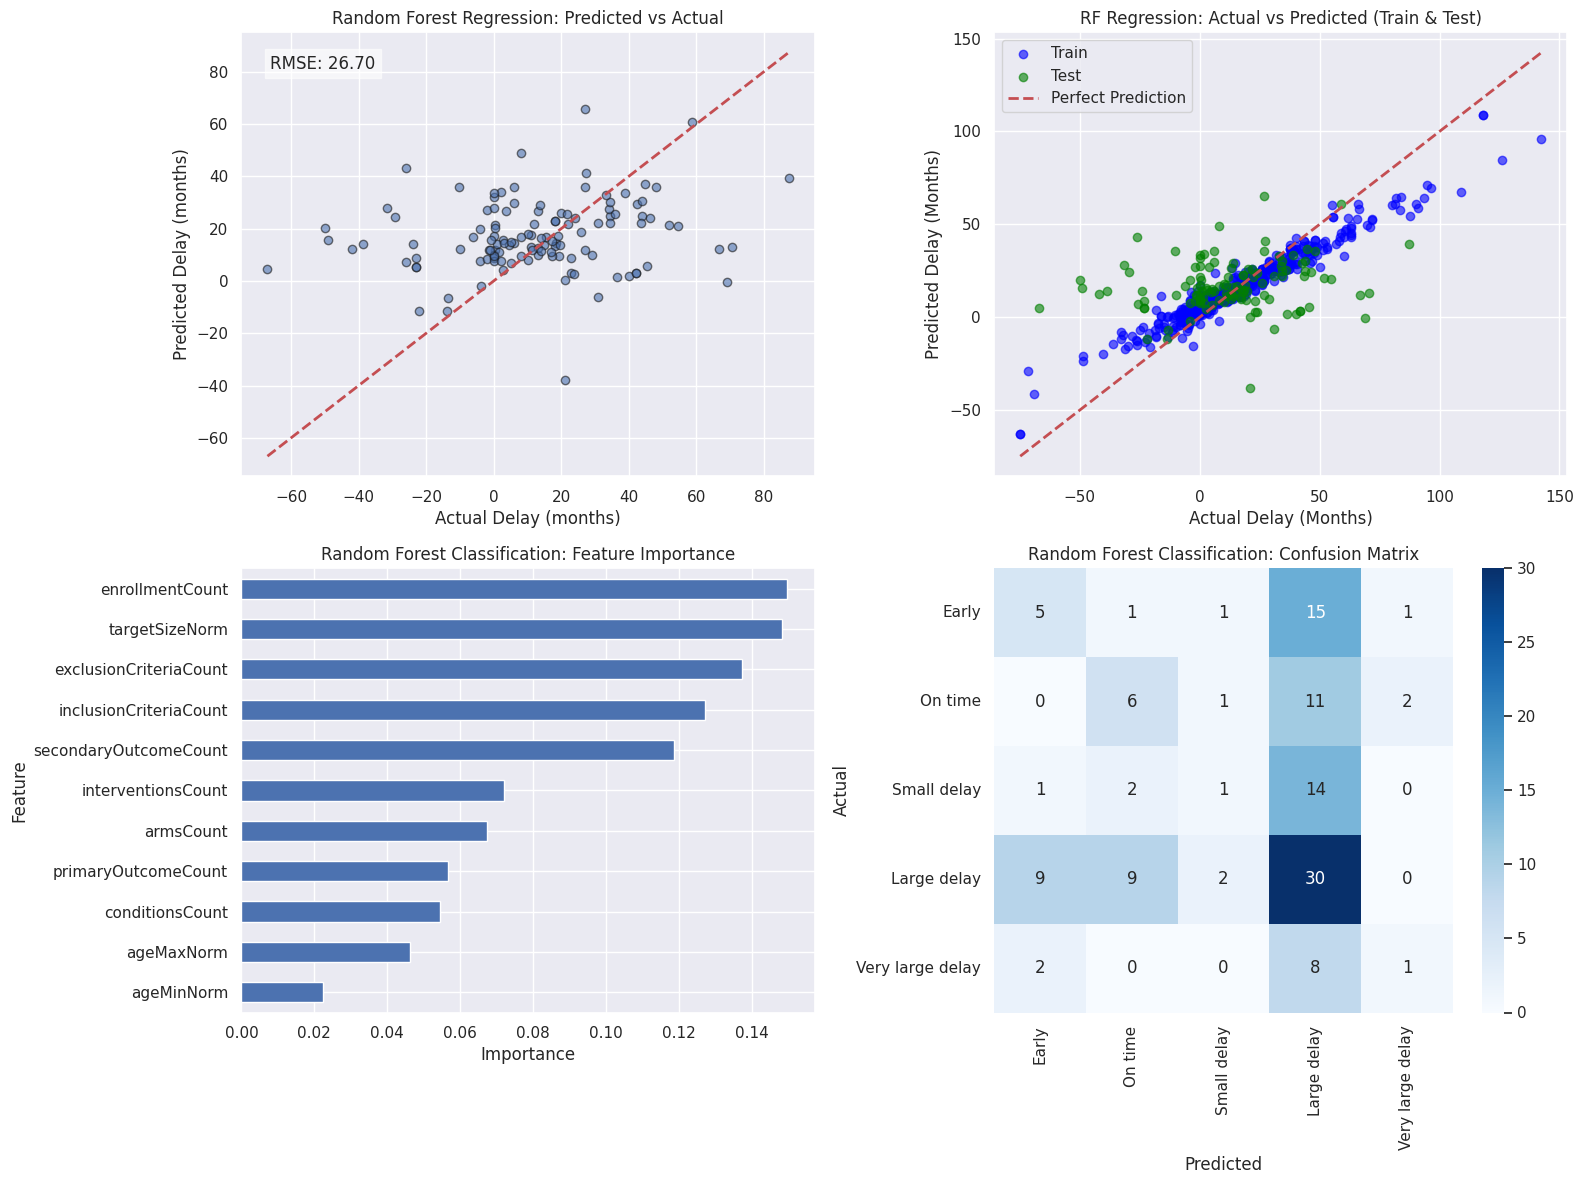

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification Report:

                  precision    recall  f1-score   support

           Early       0.29      0.22      0.25        23
         On time       0.38      0.60      0.47        50
     Small delay       0.33      0.30      0.32        20
     Large delay       0.20      0.06      0.09        18
Very large delay       0.25      0.09      0.13        11

        accuracy                           0.35       122
       macro avg       0.29      0.25      0.25       122
    weighted avg       0.32      0.35      0.32       122



In [54]:
# -----------------------------
# Prepare numerical features
# -----------------------------

y_reg = comp_trials['DelayCalc']
bins = [-float('inf'), -3, 3, 12, 48, float('inf')]
labels = ['Early', 'On time', 'Small delay', 'Large delay', 'Very large delay']
comp_trials['DelayPattern'] = pd.cut(comp_trials['DelayCalc'], bins=bins, labels=labels)
y_clf = comp_trials['DelayPattern']

# Train/test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Scale features (optional for RF)
scaler = StandardScaler()
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

# -----------------------------
# Random Forest Regression
# -----------------------------
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_r_scaled, y_train_r)
y_pred_r = rf_reg.predict(X_test_r_scaled)
y_train_pred = rf_reg.predict(X_train_r_scaled)

# -----------------------------
# Random Forest Classification
# -----------------------------
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_c_scaled, y_train_c)
y_pred_c = rf_clf.predict(X_test_c_scaled)

# Feature importance
feat_importances = pd.Series(rf_clf.feature_importances_, index=features_numerical).sort_values()

# -----------------------------
# Create combined figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Regression plot: predicted vs actual
axes[0,0].scatter(y_test_r, y_pred_r, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test_r.min(), y_test_r.max()],
               [y_test_r.min(), y_test_r.max()],
               'r--', lw=2)
axes[0,0].set_xlabel("Actual Delay (months)")
axes[0,0].set_ylabel("Predicted Delay (months)")
axes[0,0].set_title("Random Forest Regression: Predicted vs Actual")
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse:.2f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Bottom-right: Actual vs Predicted (train & test)
axes[0,1].scatter(y_train_r, y_train_pred, alpha=0.6, color='blue', label='Train')
axes[0,1].scatter(y_test_r, y_pred_r, alpha=0.6, color='green', label='Test')
min_val = min(y_train_r.min(), y_test_r.min())
max_val = max(y_train_r.max(), y_test_r.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0,1].set_xlabel("Actual Delay (Months)")
axes[0,1].set_ylabel("Predicted Delay (Months)")
axes[0,1].set_title("RF Regression: Actual vs Predicted (Train & Test)")
axes[0,1].legend()
axes[0,1].grid(True)

# Feature importance
feat_importances.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title("Random Forest Classification: Feature Importance")
axes[1,0].set_xlabel("Importance")
axes[1,0].set_ylabel("Feature")

# Classification plot: confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[1,1])
axes[1,1].set_xlabel("Predicted")
axes[1,1].set_ylabel("Actual")
axes[1,1].set_title("Random Forest Classification: Confusion Matrix")

plt.tight_layout()

# Save to PNG
file_name = 'RF Duration vs Delay(months).png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

# Download the file
files.download(file_name)

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test_c, y_pred_c, target_names=labels))


### Delay as % of estimated duration


In [50]:
# -----------------------------
# Prepare numerical features
# -----------------------------
X = comp_trials[features_numerical].fillna(0)
# Regression target: DelayPerc
y_reg = comp_trials['DelayPerc'].fillna(0)

# Create classification target using quantiles
# -----------------------------
n_classes = 5  # number of categories
quantiles = np.linspace(0, 1, n_classes + 1)
bin_edges = comp_trials['DelayPerc'].quantile(quantiles).values
# Ensure unique edges to avoid issues
bin_edges = np.unique(bin_edges)
labels = [f'Q{i+1}' for i in range(len(bin_edges)-1)]
comp_trials['DelayPatternPerc'] = pd.cut(comp_trials['DelayPerc'], bins=bin_edges, labels=labels, include_lowest=True)
y_clf = comp_trials['DelayPatternPerc']



# -----------------------------
# Train/test split
# -----------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# -----------------------------
# Random Forest Regression
# -----------------------------
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_r, y_train_r)
y_pred_r = rf_reg.predict(X_test_r)
y_train_pred = rf_reg.predict(X_train_r)

# -----------------------------
# Random Forest Classification
# -----------------------------
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_c = rf_clf.predict(X_test_c)

# Ensure both y_test and y_pred are strings for confusion matrix
y_test_c_str = y_test_c.astype(str)
y_pred_c_str = pd.Series(y_pred_c).astype(str)

# Feature importance
feat_importances = pd.Series(rf_clf.feature_importances_, index=features_numerical).sort_values()

# -----------------------------
# Create 2x2 figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Regression plot (test only)
axes[0,0].scatter(y_test_r, y_pred_r, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test_r.min(), y_test_r.max()],
               [y_test_r.min(), y_test_r.max()],
               'r--', lw=2)
axes[0,0].set_xlabel("Actual Delay (%)")
axes[0,0].set_ylabel("Predicted Delay (%)")
axes[0,0].set_title("RF Regression: Predicted vs Actual Delay (%)")
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse:.2f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Top-right: Actual vs Predicted (train & test)
axes[0,1].scatter(y_train_r, y_train_pred, alpha=0.6, color='blue', label='Train')
axes[0,1].scatter(y_test_r, y_pred_r, alpha=0.6, color='green', label='Test')
min_val = min(y_train_r.min(), y_test_r.min())
max_val = max(y_train_r.max(), y_test_r.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0,1].set_xlabel("Actual Delay (%)")
axes[0,1].set_ylabel("Predicted Delay (%)")
axes[0,1].set_title("RF Regression: Actual vs Predicted (Train & Test)")
axes[0,1].legend()
axes[0,1].grid(True)

# Bottom-left: Feature importance
feat_importances.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title("RF Classification: Feature Importance")
axes[1,0].set_xlabel("Importance")
axes[1,0].set_ylabel("Feature")

# Bottom-right: Classification confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[1,1])
axes[1,1].set_xlabel("Predicted")
axes[1,1].set_ylabel("Actual")
axes[1,1].set_title("Random Forest Classification: Confusion Matrix")

plt.tight_layout()

# Save to PNG
file_name = 'RF_Duration_vs_DelayPerc.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

# Optional: Download the figure
files.download(file_name)

# -----------------------------
# Print classification report
# -----------------------------
print("Classification Report (Delay %):\n")
print(classification_report(y_test_c_str, y_pred_c_str, target_names=labels))


              precision    recall  f1-score   support

          Q1       0.27      0.32      0.29        25
          Q2       0.35      0.38      0.36        24
          Q3       0.09      0.08      0.09        24
          Q4       0.32      0.24      0.27        25
          Q5       0.21      0.21      0.21        24

    accuracy                           0.25       122
   macro avg       0.24      0.25      0.24       122
weighted avg       0.25      0.25      0.24       122



In [52]:
# Number of categories
n_classes = 5

# Calculate quantiles for DelayCalc
quantiles = np.linspace(0, 1, n_classes + 1)
bin_edges = comp_trials['DelayPerc'].quantile(quantiles).values

# Ensure unique edges (in case of repeated values)
bin_edges = np.unique(bin_edges)

# Print the bin edges
print("Bin edges for DelayPattern groups:")
for i in range(len(bin_edges)-1):
    print(f"Group {i+1}: {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f} %")


Bin edges for DelayPattern groups:
Group 1: -88.20 to -5.24 %
Group 2: -5.24 to 20.52 %
Group 3: 20.52 to 62.90 %
Group 4: 62.90 to 141.60 %
Group 5: 141.60 to 741.20 %


Using set groups:
- Early: =< -10%
- On time: -10% - 10%
- Small delay: 10% - 50%
- Large delay: 50% - 100%
- Very large delay: +100%

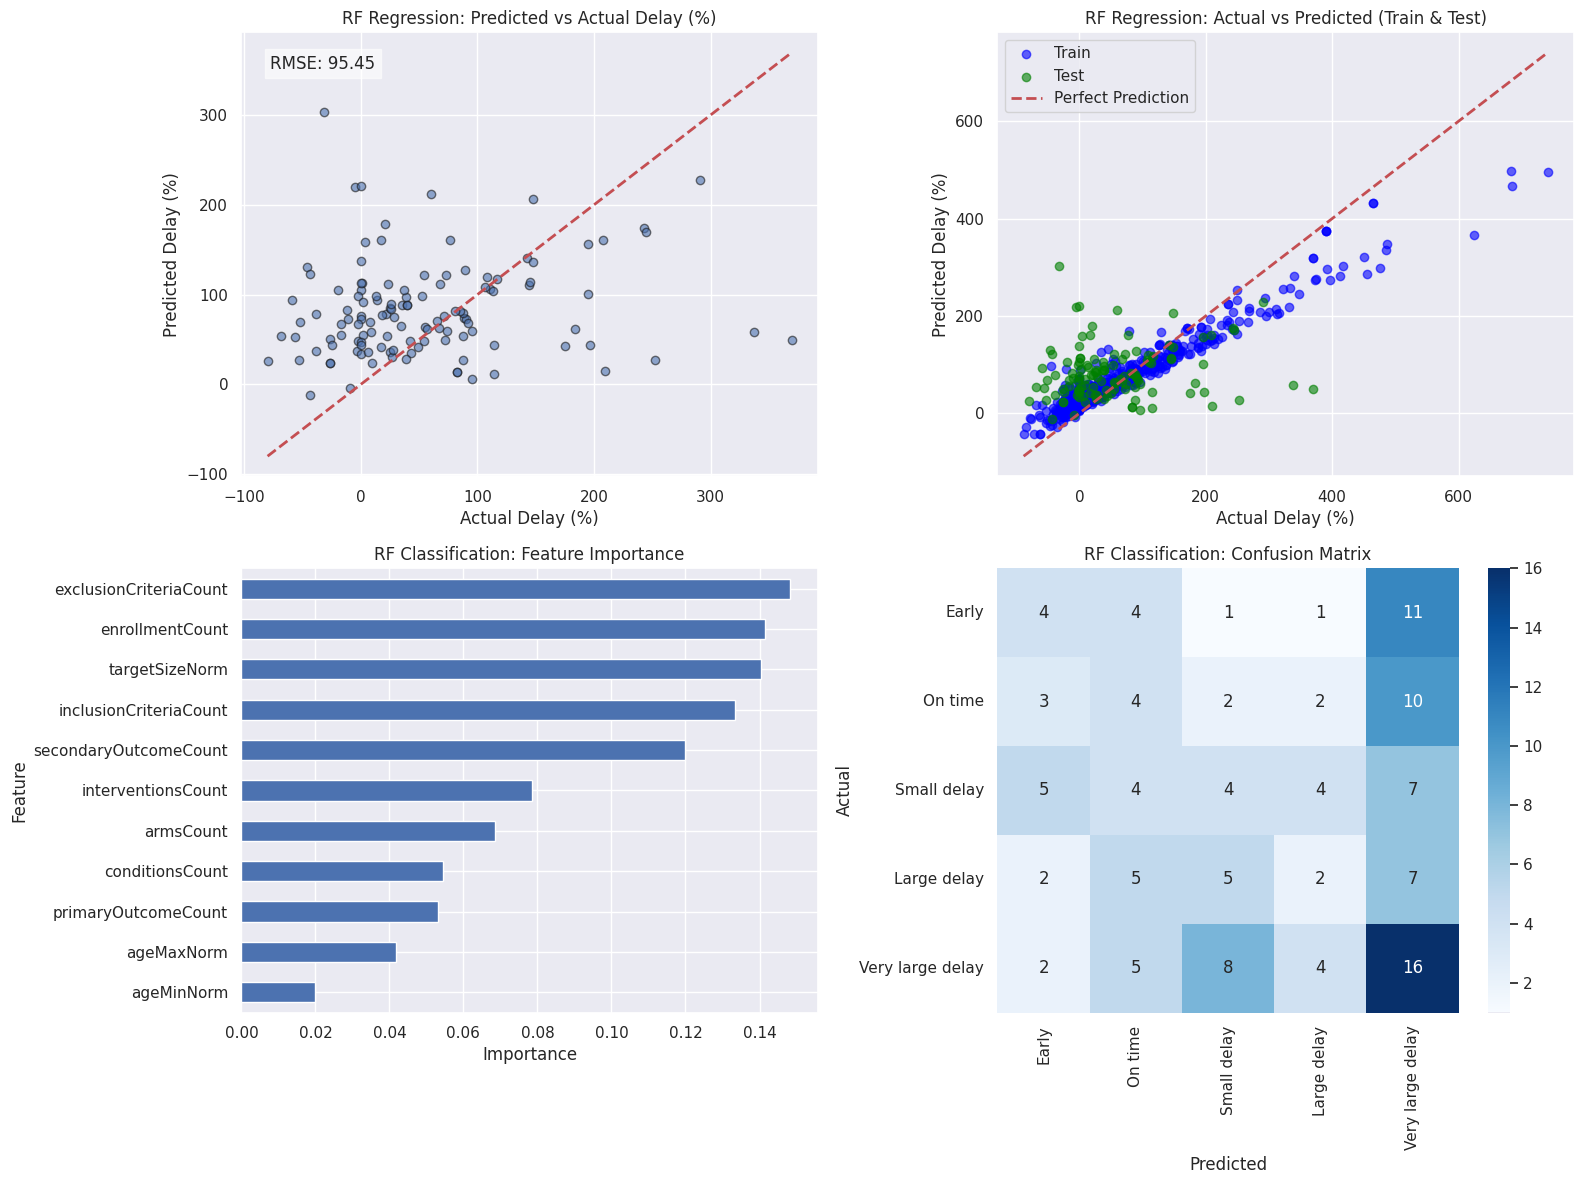

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification Report (Delay %):

                  precision    recall  f1-score   support

           Early       0.25      0.19      0.22        21
         On time       0.15      0.10      0.12        21
     Small delay       0.18      0.19      0.19        21
     Large delay       0.20      0.17      0.18        24
Very large delay       0.31      0.46      0.37        35

        accuracy                           0.25       122
       macro avg       0.22      0.22      0.21       122
    weighted avg       0.23      0.25      0.23       122



In [53]:
# -----------------------------
# Prepare numerical features
# -----------------------------
X = comp_trials[features_numerical].fillna(0)

# Regression target: DelayPerc
y_reg = comp_trials['DelayPerc'].fillna(0)

# Classification target: Delay percentage categories
bins_perc = [-float('inf'), -10, 10, 50, 100, float('inf')]
labels_perc = ['Early', 'On time', 'Small delay', 'Large delay', 'Very large delay']
comp_trials['DelayPatternPerc'] = pd.cut(y_reg, bins=bins_perc, labels=labels_perc)
y_clf = comp_trials['DelayPatternPerc']

# -----------------------------
# Train/test split
# -----------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# -----------------------------
# Random Forest Regression
# -----------------------------
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_r, y_train_r)
y_pred_r = rf_reg.predict(X_test_r)
y_train_pred = rf_reg.predict(X_train_r)

# -----------------------------
# Random Forest Classification
# -----------------------------
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_c = rf_clf.predict(X_test_c)

# Ensure both y_test and y_pred are strings for confusion matrix
y_test_c_str = y_test_c.astype(str)
y_pred_c_str = pd.Series(y_pred_c).astype(str)

# Feature importance
feat_importances = pd.Series(rf_clf.feature_importances_, index=features_numerical).sort_values()

# -----------------------------
# Create 2x2 figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Regression plot (test only)
axes[0,0].scatter(y_test_r, y_pred_r, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test_r.min(), y_test_r.max()],
               [y_test_r.min(), y_test_r.max()],
               'r--', lw=2)
axes[0,0].set_xlabel("Actual Delay (%)")
axes[0,0].set_ylabel("Predicted Delay (%)")
axes[0,0].set_title("RF Regression: Predicted vs Actual Delay (%)")
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse:.2f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Top-right: Actual vs Predicted (train & test)
axes[0,1].scatter(y_train_r, y_train_pred, alpha=0.6, color='blue', label='Train')
axes[0,1].scatter(y_test_r, y_pred_r, alpha=0.6, color='green', label='Test')
min_val = min(y_train_r.min(), y_test_r.min())
max_val = max(y_train_r.max(), y_test_r.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0,1].set_xlabel("Actual Delay (%)")
axes[0,1].set_ylabel("Predicted Delay (%)")
axes[0,1].set_title("RF Regression: Actual vs Predicted (Train & Test)")
axes[0,1].legend()
axes[0,1].grid(True)

# Bottom-left: Feature importance
feat_importances.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title("RF Classification: Feature Importance")
axes[1,0].set_xlabel("Importance")
axes[1,0].set_ylabel("Feature")

# Bottom-right: Classification confusion matrix
cm = confusion_matrix(y_test_c_str, y_pred_c_str, labels=labels_perc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_perc, yticklabels=labels_perc, ax=axes[1,1])
axes[1,1].set_xlabel("Predicted")
axes[1,1].set_ylabel("Actual")
axes[1,1].set_title("RF Classification: Confusion Matrix")

plt.tight_layout()

# Save to PNG
file_name = 'RF_Duration_vs_DelayPerc.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

# Optional: Download the figure
files.download(file_name)

# -----------------------------
# Print classification report
# -----------------------------
print("Classification Report (Delay %):\n")
print(classification_report(y_test_c_str, y_pred_c_str, target_names=labels_perc))


## RF with categorical and numerical features


###Delay in months

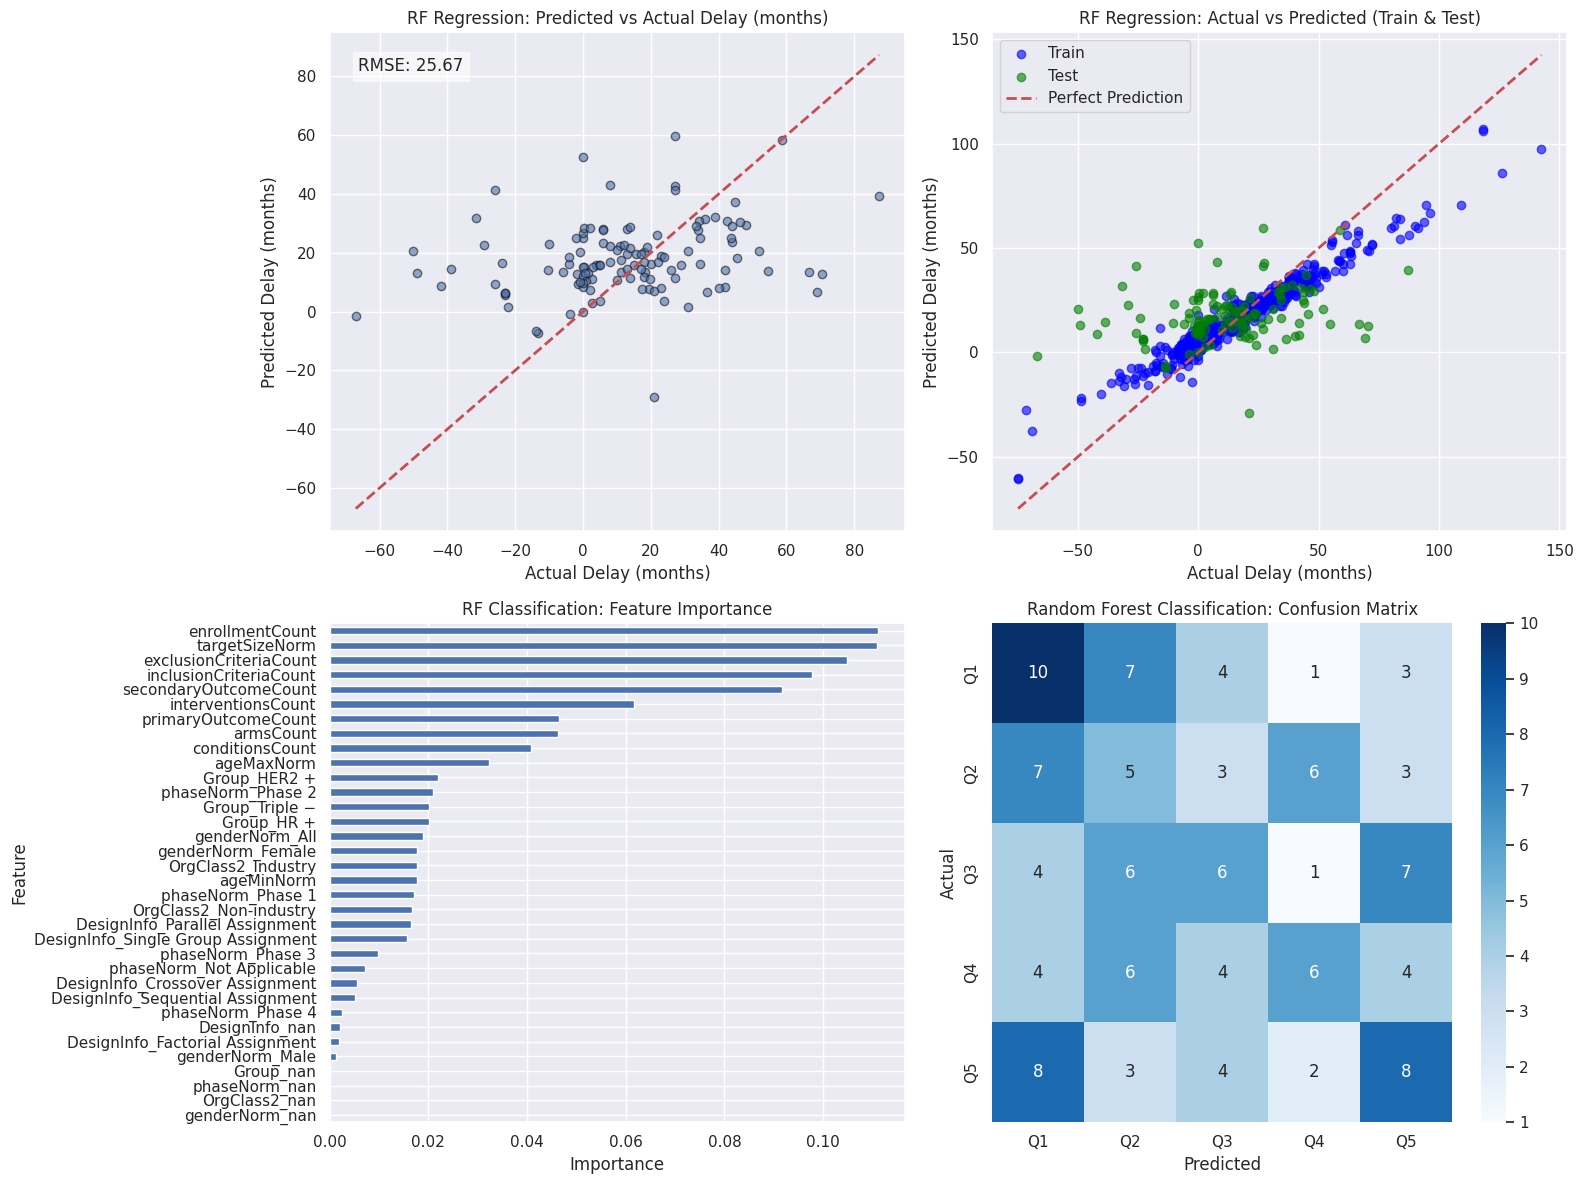

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification Report (DelayCalc):

              precision    recall  f1-score   support

          Q1       0.30      0.40      0.34        25
          Q2       0.19      0.21      0.20        24
          Q3       0.29      0.25      0.27        24
          Q4       0.38      0.25      0.30        24
          Q5       0.32      0.32      0.32        25

    accuracy                           0.29       122
   macro avg       0.29      0.29      0.29       122
weighted avg       0.29      0.29      0.29       122



In [63]:
# -----------------------------
# Prepare features
# -----------------------------
# Numerical features
X_num = comp_trials[features_numerical].fillna(0)

# Categorical features (one-hot encode)
X_cat = pd.get_dummies(comp_trials[features_categorical], dummy_na=True)

# Combine numerical and categorical features
X = pd.concat([X_num, X_cat], axis=1)

# Regression target: DelayCalc
y_reg = comp_trials['DelayCalc'].fillna(0)

# Classification target using quantiles
n_classes = 5  # number of categories
quantiles = np.linspace(0, 1, n_classes + 1)
bin_edges = comp_trials['DelayCalc'].quantile(quantiles).values
bin_edges = np.unique(bin_edges)  # avoid duplicate edges
labels = [f'Q{i+1}' for i in range(len(bin_edges)-1)]
comp_trials['DelayPatternCalc'] = pd.cut(
    comp_trials['DelayCalc'],
    bins=bin_edges,
    labels=labels,
    include_lowest=True
)
y_clf = comp_trials['DelayPatternCalc']

# -----------------------------
# Train/test split
# -----------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# -----------------------------
# Random Forest Regression
# -----------------------------
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_r, y_train_r)
y_pred_r = rf_reg.predict(X_test_r)
y_train_pred = rf_reg.predict(X_train_r)

# -----------------------------
# Random Forest Classification
# -----------------------------
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_c = rf_clf.predict(X_test_c)

# Ensure both y_test and y_pred are strings for confusion matrix
y_test_c_str = y_test_c.astype(str)
y_pred_c_str = pd.Series(y_pred_c).astype(str)

# Feature importance
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values()

# -----------------------------
# Create 2x2 figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Regression plot (test only)
axes[0,0].scatter(y_test_r, y_pred_r, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test_r.min(), y_test_r.max()],
               [y_test_r.min(), y_test_r.max()],
               'r--', lw=2)
axes[0,0].set_xlabel("Actual Delay (months)")
axes[0,0].set_ylabel("Predicted Delay (months)")
axes[0,0].set_title("RF Regression: Predicted vs Actual Delay (months)")
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse:.2f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Top-right: Actual vs Predicted (train & test)
axes[0,1].scatter(y_train_r, y_train_pred, alpha=0.6, color='blue', label='Train')
axes[0,1].scatter(y_test_r, y_pred_r, alpha=0.6, color='green', label='Test')
min_val = min(y_train_r.min(), y_test_r.min())
max_val = max(y_train_r.max(), y_test_r.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0,1].set_xlabel("Actual Delay (months)")
axes[0,1].set_ylabel("Predicted Delay (months)")
axes[0,1].set_title("RF Regression: Actual vs Predicted (Train & Test)")
axes[0,1].legend()
axes[0,1].grid(True)

# Bottom-left: Feature importance
feat_importances.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title("RF Classification: Feature Importance")
axes[1,0].set_xlabel("Importance")
axes[1,0].set_ylabel("Feature")

# Bottom-right: Classification confusion matrix
cm = confusion_matrix(y_test_c_str, y_pred_c_str, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[1,1])
axes[1,1].set_xlabel("Predicted")
axes[1,1].set_ylabel("Actual")
axes[1,1].set_title("Random Forest Classification: Confusion Matrix")

plt.tight_layout()

# Save figure
file_name = 'RF_Duration_vs_DelayCalc.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

# Optional: Download the figure
files.download(file_name)

# -----------------------------
# Print classification report
# -----------------------------
print("Classification Report (DelayCalc):\n")
print(classification_report(y_test_c_str, y_pred_c_str, target_names=labels))

In [64]:

# Number of categories
n_classes = 5

# Calculate quantiles for DelayCalc
quantiles = np.linspace(0, 1, n_classes + 1)
bin_edges = comp_trials['DelayCalc'].quantile(quantiles).values

# Ensure unique edges (in case of repeated values)
bin_edges = np.unique(bin_edges)

# Print the bin edges
print("Bin edges for DelayPattern groups:")
for i in range(len(bin_edges)-1):
    print(f"Group {i+1}: {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f} months")


Bin edges for DelayPattern groups:
Group 1: -74.80 to -2.00 months
Group 2: -2.00 to 5.92 months
Group 3: 5.92 to 18.56 months
Group 4: 18.56 to 35.82 months
Group 5: 35.82 to 142.50 months


### Delay as % of estimated duration



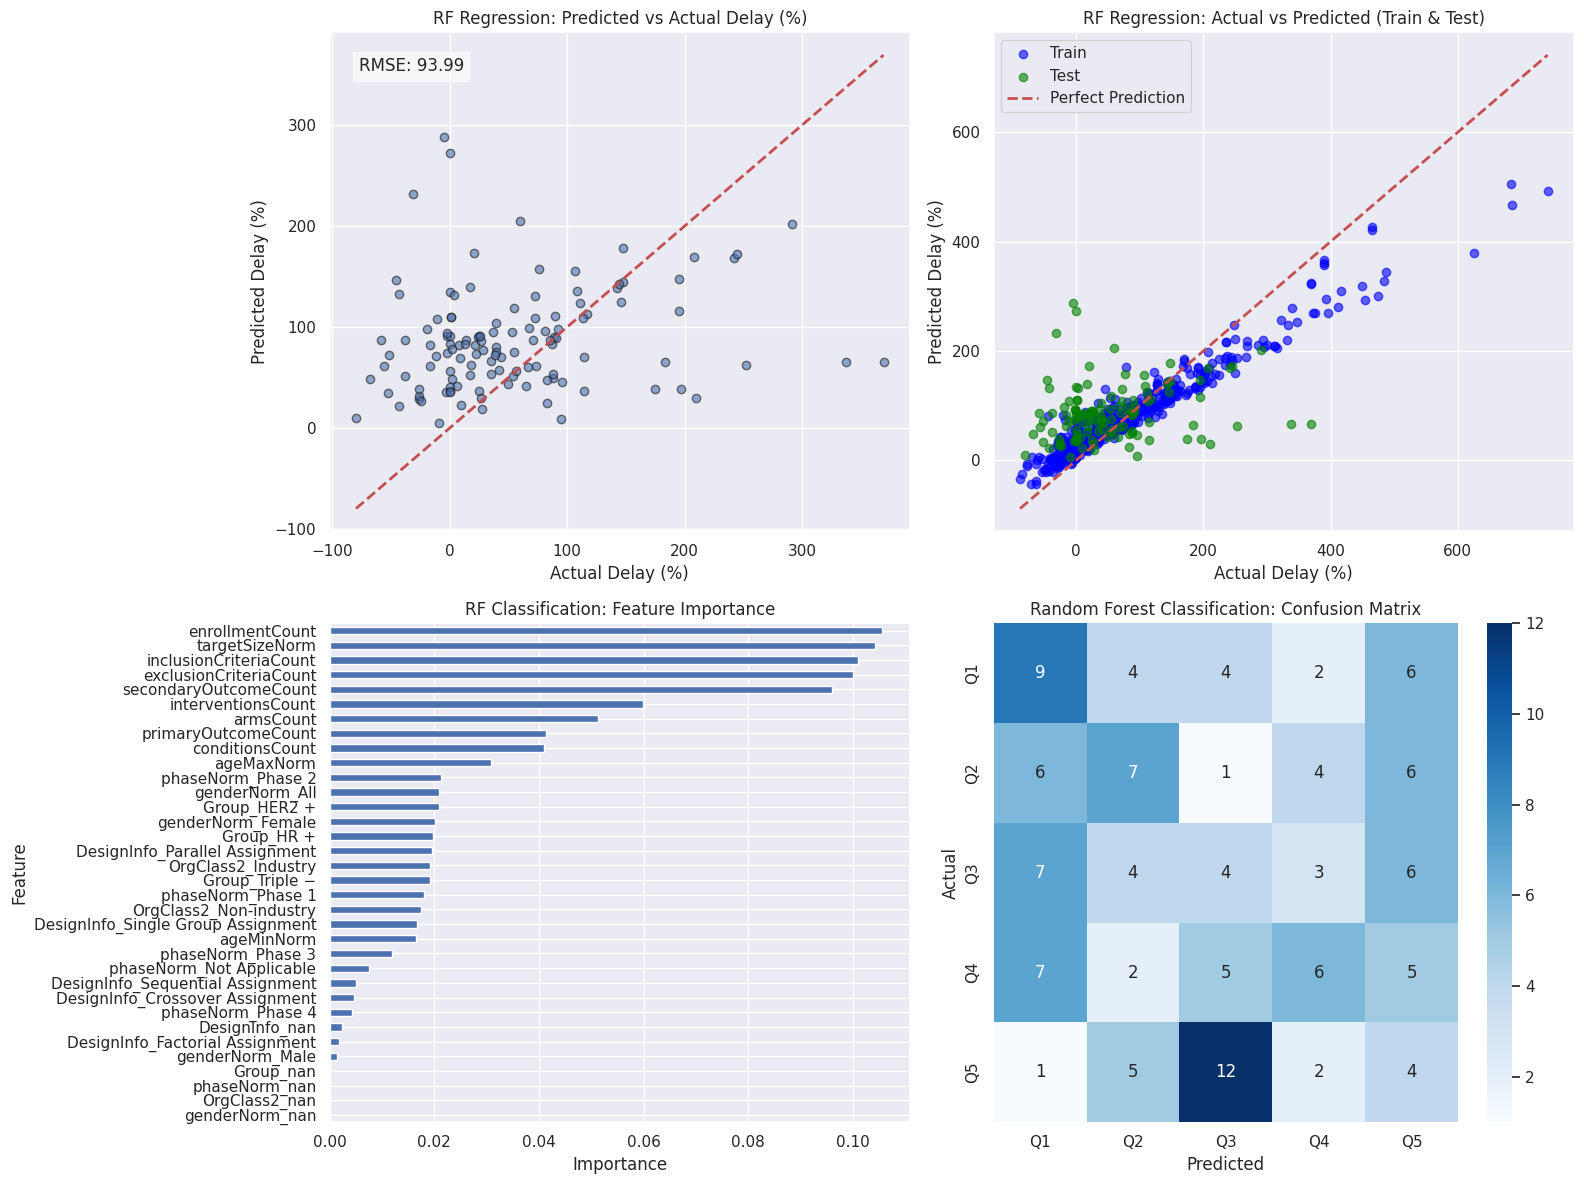

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification Report (Delay %):

              precision    recall  f1-score   support

          Q1       0.30      0.36      0.33        25
          Q2       0.32      0.29      0.30        24
          Q3       0.15      0.17      0.16        24
          Q4       0.35      0.24      0.29        25
          Q5       0.15      0.17      0.16        24

    accuracy                           0.25       122
   macro avg       0.25      0.24      0.25       122
weighted avg       0.26      0.25      0.25       122



In [59]:
# -----------------------------
# Prepare features
# -----------------------------
# Numerical features
X_num = comp_trials[features_numerical].fillna(0)

# Categorical features (one-hot encode)
X_cat = pd.get_dummies(comp_trials[features_categorical], dummy_na=True)

# Combine numerical and categorical features
X = pd.concat([X_num, X_cat], axis=1)

# Regression target: DelayPerc
y_reg = comp_trials['DelayPerc'].fillna(0)

# Classification target using quantiles
n_classes = 5  # number of categories
quantiles = np.linspace(0, 1, n_classes + 1)
bin_edges = comp_trials['DelayPerc'].quantile(quantiles).values
bin_edges = np.unique(bin_edges)  # avoid duplicate edges
labels = [f'Q{i+1}' for i in range(len(bin_edges)-1)]
comp_trials['DelayPatternPerc'] = pd.cut(
    comp_trials['DelayPerc'],
    bins=bin_edges,
    labels=labels,
    include_lowest=True
)
y_clf = comp_trials['DelayPatternPerc']

# -----------------------------
# Train/test split
# -----------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# -----------------------------
# Random Forest Regression
# -----------------------------
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train_r, y_train_r)
y_pred_r = rf_reg.predict(X_test_r)
y_train_pred = rf_reg.predict(X_train_r)

# -----------------------------
# Random Forest Classification
# -----------------------------
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_c = rf_clf.predict(X_test_c)

# Ensure both y_test and y_pred are strings for confusion matrix
y_test_c_str = y_test_c.astype(str)
y_pred_c_str = pd.Series(y_pred_c).astype(str)

# Feature importance
feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values()

# -----------------------------
# Create 2x2 figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Regression plot (test only)
axes[0,0].scatter(y_test_r, y_pred_r, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test_r.min(), y_test_r.max()],
               [y_test_r.min(), y_test_r.max()],
               'r--', lw=2)
axes[0,0].set_xlabel("Actual Delay (%)")
axes[0,0].set_ylabel("Predicted Delay (%)")
axes[0,0].set_title("RF Regression: Predicted vs Actual Delay (%)")
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse:.2f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

# Top-right: Actual vs Predicted (train & test)
axes[0,1].scatter(y_train_r, y_train_pred, alpha=0.6, color='blue', label='Train')
axes[0,1].scatter(y_test_r, y_pred_r, alpha=0.6, color='green', label='Test')
min_val = min(y_train_r.min(), y_test_r.min())
max_val = max(y_train_r.max(), y_test_r.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0,1].set_xlabel("Actual Delay (%)")
axes[0,1].set_ylabel("Predicted Delay (%)")
axes[0,1].set_title("RF Regression: Actual vs Predicted (Train & Test)")
axes[0,1].legend()
axes[0,1].grid(True)

# Bottom-left: Feature importance
feat_importances.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title("RF Classification: Feature Importance")
axes[1,0].set_xlabel("Importance")
axes[1,0].set_ylabel("Feature")

# Bottom-right: Classification confusion matrix
cm = confusion_matrix(y_test_c_str, y_pred_c_str, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[1,1])
axes[1,1].set_xlabel("Predicted")
axes[1,1].set_ylabel("Actual")
axes[1,1].set_title("Random Forest Classification: Confusion Matrix")

plt.tight_layout()

# Save figure
file_name = 'RF_Duration_vs_DelayPerc_withCategorical.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

# Optional: Download the figure
files.download(file_name)

# -----------------------------
# Print classification report
# -----------------------------
print("Classification Report (Delay %):\n")
print(classification_report(y_test_c_str, y_pred_c_str, target_names=labels))


In [62]:
# Number of categories
n_classes = 5

# Calculate quantiles for DelayCalc
quantiles = np.linspace(0, 1, n_classes + 1)
bin_edges = comp_trials['DelayPerc'].quantile(quantiles).values

# Ensure unique edges (in case of repeated values)
bin_edges = np.unique(bin_edges)

# Print the bin edges
print("Bin edges for DelayPattern groups:")
for i in range(len(bin_edges)-1):
    print(f"Group {i+1}: {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f} %")


Bin edges for DelayPattern groups:
Group 1: -88.20 to -5.24 %
Group 2: -5.24 to 20.52 %
Group 3: 20.52 to 62.90 %
Group 4: 62.90 to 141.60 %
Group 5: 141.60 to 741.20 %


# XGBoost


XGBoost might improve classifiaction metrics, as my dataset might have unbalanced groups, and it can handle features much better.

Furthermore, there are options to improve the model by allowing different things to improve presicion and recall.

## Delay in months

XGB Regression -> RMSE: 27.48 months, R²: -0.170


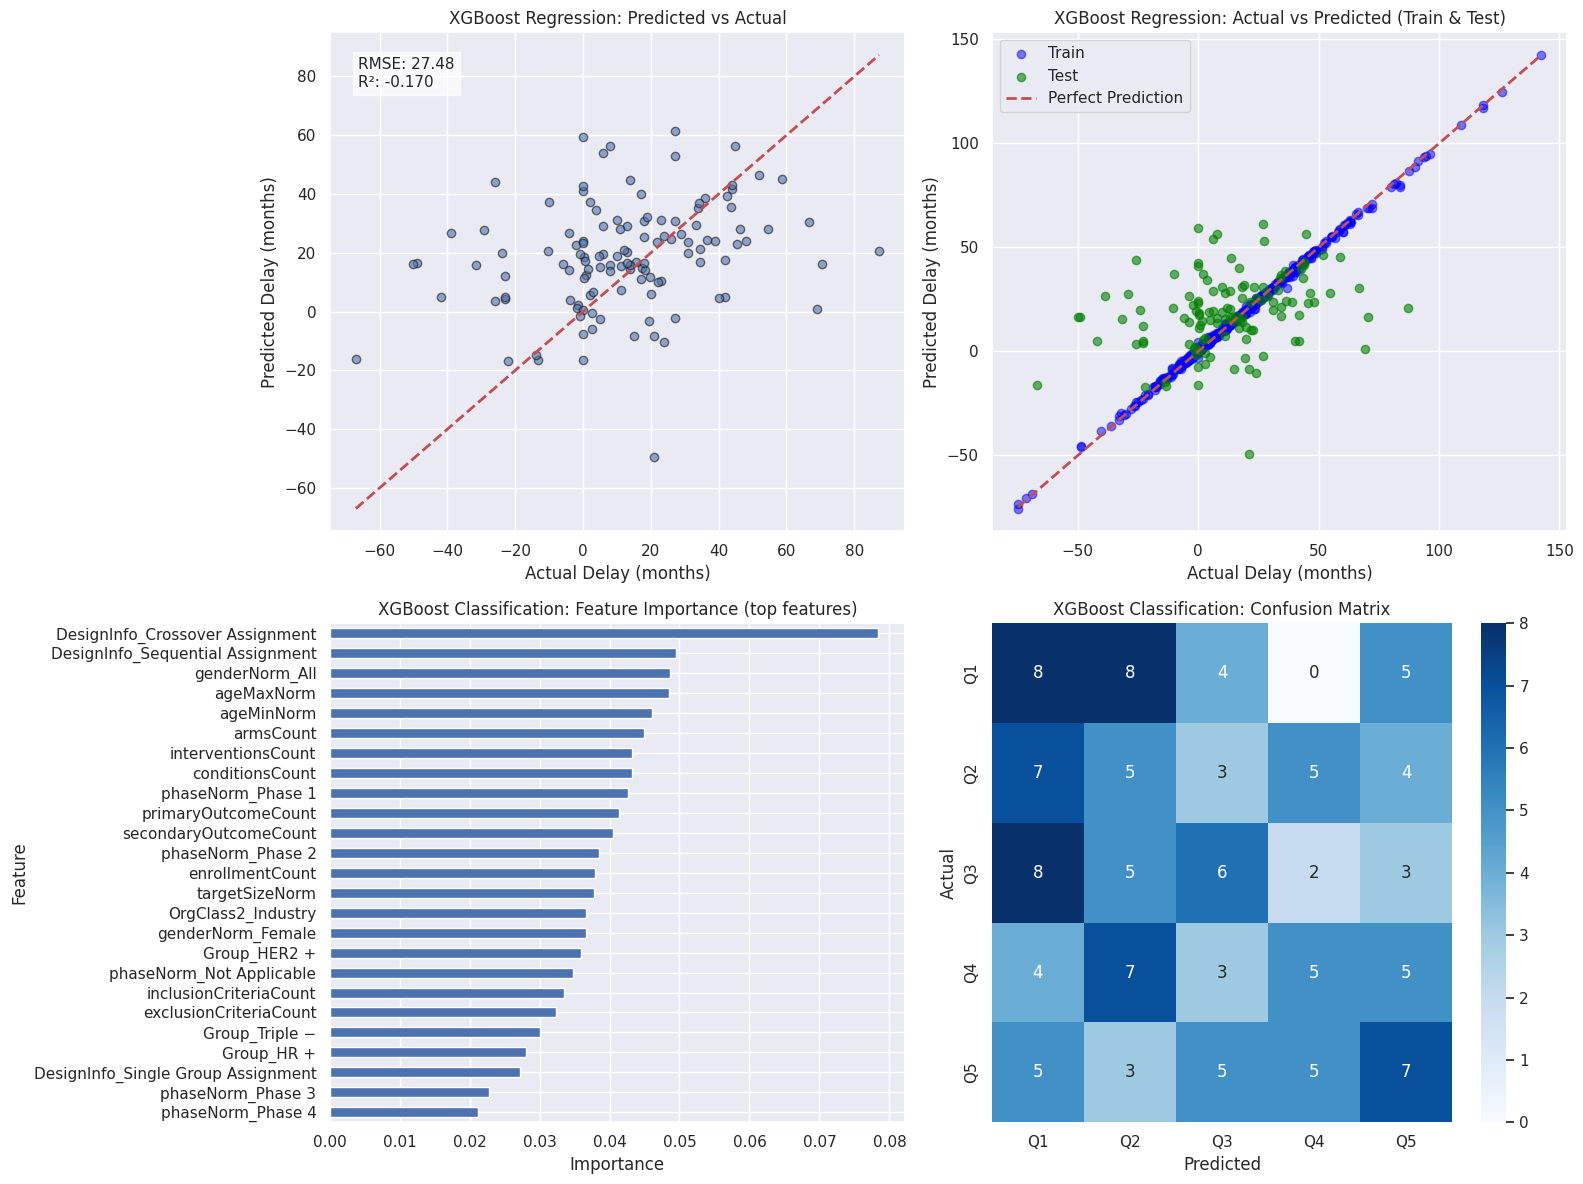

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Classification Report (XGBoost):

              precision    recall  f1-score   support

          Q1       0.25      0.32      0.28        25
          Q2       0.18      0.21      0.19        24
          Q3       0.29      0.25      0.27        24
          Q4       0.29      0.21      0.24        24
          Q5       0.29      0.28      0.29        25

    accuracy                           0.25       122
   macro avg       0.26      0.25      0.25       122
weighted avg       0.26      0.25      0.25       122



In [74]:
# -----------------------------
# XGBoost pipeline: DelayCalc (fixed)
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
import xgboost as xgb

# -----------------------------
# Prepare features
# -----------------------------
X_num = comp_trials[features_numerical].fillna(0)
X_cat = pd.get_dummies(comp_trials[features_categorical].fillna('MISSING'), drop_first=False)
X = pd.concat([X_num, X_cat], axis=1)

# -----------------------------
# Regression target: DelayCalc
# -----------------------------
y_reg = comp_trials['DelayCalc'].fillna(0)

# -----------------------------
# Classification target: quantile bins
# -----------------------------
n_classes = 5
quantiles = np.linspace(0, 1, n_classes + 1)
bin_edges = comp_trials['DelayCalc'].quantile(quantiles).values
bin_edges = np.unique(bin_edges)
labels_str = [f'Q{i+1}' for i in range(len(bin_edges)-1)]

comp_trials['DelayPatternCalc'] = pd.cut(
    comp_trials['DelayCalc'],
    bins=bin_edges,
    labels=labels_str,
    include_lowest=True
)
y_clf_str = comp_trials['DelayPatternCalc']

# Map string labels to integers for XGBoost
label_map = {label: i for i, label in enumerate(labels_str)}
y_clf_int = y_clf_str.map(label_map)

# -----------------------------
# Train/test split
# -----------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_clf_int, test_size=0.2, random_state=42, stratify=y_clf_int
)

# -----------------------------
# XGBoost Regressor
# -----------------------------
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    random_state=42,
    verbosity=0
)
xgb_reg.fit(X_train_r, y_train_r)
y_pred_r = xgb_reg.predict(X_test_r)
y_train_pred = xgb_reg.predict(X_train_r)

mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_r)
print(f"XGB Regression -> RMSE: {rmse:.2f} months, R²: {r2:.3f}")

# -----------------------------
# XGBoost Classifier
# -----------------------------
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    verbosity=0
)
xgb_clf.fit(X_train_c, y_train_c)

y_pred_c_int = xgb_clf.predict(X_test_c)

# Map integers back to string labels
inv_label_map = {v: k for k, v in label_map.items()}
y_test_c_str = y_test_c.map(inv_label_map)
y_pred_c_str = pd.Series(y_pred_c_int).map(inv_label_map)

# -----------------------------
# Feature importance
# -----------------------------
feat_importances = pd.Series(xgb_clf.feature_importances_, index=X.columns).sort_values()

# -----------------------------
# Create 2x2 figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Regression predicted vs actual
axes[0,0].scatter(y_test_r, y_pred_r, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test_r.min(), y_test_r.max()],
               [y_test_r.min(), y_test_r.max()],
               'r--', lw=2)
axes[0,0].set_xlabel("Actual Delay (months)")
axes[0,0].set_ylabel("Predicted Delay (months)")
axes[0,0].set_title("XGBoost Regression: Predicted vs Actual")
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse:.2f}\nR²: {r2:.3f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=11, bbox=dict(facecolor='white', alpha=0.7))

# Top-right: Regression train vs test
axes[0,1].scatter(y_train_r, y_train_pred, alpha=0.5, color='blue', label='Train')
axes[0,1].scatter(y_test_r, y_pred_r, alpha=0.6, color='green', label='Test')
min_val = min(y_train_r.min(), y_test_r.min())
max_val = max(y_train_r.max(), y_test_r.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0,1].set_xlabel("Actual Delay (months)")
axes[0,1].set_ylabel("Predicted Delay (months)")
axes[0,1].set_title("XGBoost Regression: Actual vs Predicted (Train & Test)")
axes[0,1].legend()
axes[0,1].grid(True)

# Bottom-left: Feature importance (top 25)
topn = min(25, len(feat_importances))
feat_importances.tail(topn).plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title("XGBoost Classification: Feature Importance (top features)")
axes[1,0].set_xlabel("Importance")
axes[1,0].set_ylabel("Feature")

# Bottom-right: Confusion matrix
cm = confusion_matrix(y_test_c_str, y_pred_c_str, labels=labels_str)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_str, yticklabels=labels_str, ax=axes[1,1])
axes[1,1].set_xlabel("Predicted")
axes[1,1].set_ylabel("Actual")
axes[1,1].set_title("XGBoost Classification: Confusion Matrix")

plt.tight_layout()


# Save figure
file_name = 'XGBoost_Duration_vs_Delaycalc.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

# Optional: Download the figure
files.download(file_name)



# -----------------------------
# Classification report
# -----------------------------
print("\nClassification Report (XGBoost):\n")
print(classification_report(y_test_c_str, y_pred_c_str, target_names=labels_str))


##Improve XGBoost to see if we can get the performance better


XGB Regression -> RMSE: 95.39 %, R²: -0.326


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:14:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


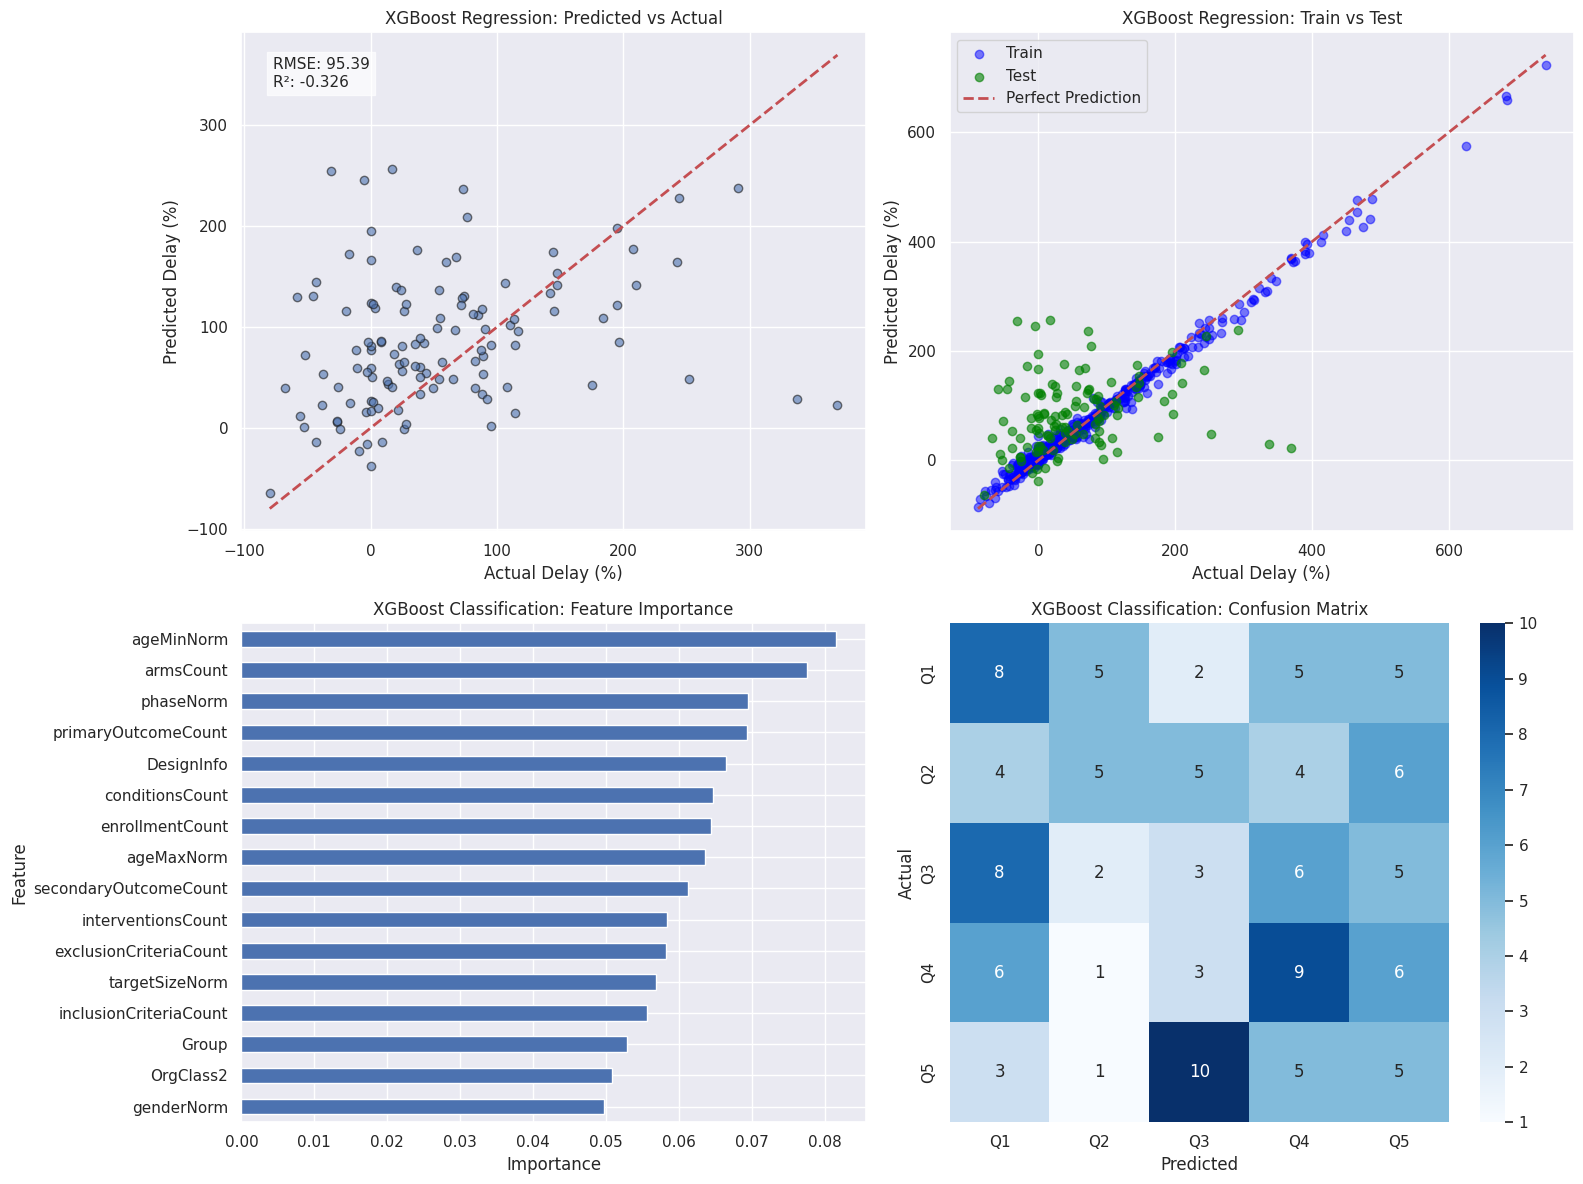


Classification Report (XGBoost):

              precision    recall  f1-score   support

          Q1       0.28      0.32      0.30        25
          Q2       0.36      0.21      0.26        24
          Q3       0.13      0.12      0.13        24
          Q4       0.31      0.36      0.33        25
          Q5       0.19      0.21      0.20        24

    accuracy                           0.25       122
   macro avg       0.25      0.24      0.24       122
weighted avg       0.25      0.25      0.24       122



In [87]:
# -----------------------------
# Optimized XGBoost pipeline: DelayPerc
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
import xgboost as xgb

# -----------------------------
# Prepare features
# -----------------------------
# Scale numerical features
X_num = comp_trials[features_numerical].fillna(0)
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=comp_trials.index)

# Manual target encoding for categorical features
X_cat = comp_trials[features_categorical].fillna('MISSING').copy()
X_cat.index = comp_trials.index
y_target = comp_trials['DelayPerc'].fillna(0)

for col in X_cat.columns:
    mean_map = comp_trials.groupby(col)['DelayPerc'].mean()
    X_cat[col] = X_cat[col].map(mean_map).fillna(y_target.mean())

# Combine features
X = pd.concat([X_num_scaled, X_cat], axis=1)
y_reg = y_target

# -----------------------------
# Classification target: quantile bins
# -----------------------------
n_classes = 5
quantiles = np.linspace(0, 1, n_classes + 1)
bin_edges = np.unique(y_reg.quantile(quantiles).values)
labels_str = [f'Q{i+1}' for i in range(len(bin_edges)-1)]
comp_trials['DelayPatternPerc'] = pd.cut(y_reg, bins=bin_edges, labels=labels_str, include_lowest=True)
y_clf_str = comp_trials['DelayPatternPerc']
label_map = {label: i for i, label in enumerate(labels_str)}
y_clf_int = y_clf_str.map(label_map)

# -----------------------------
# Train/test split
# -----------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_clf_int, test_size=0.2, random_state=42, stratify=y_clf_int
)

# -----------------------------
# XGBoost Regressor (optimized)
# -----------------------------
xgb_reg = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)
xgb_reg.fit(X_train_r, y_train_r)
y_pred_r = xgb_reg.predict(X_test_r)
y_train_pred = xgb_reg.predict(X_train_r)

mse = mean_squared_error(y_test_r, y_pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_r, y_pred_r)
print(f"XGB Regression -> RMSE: {rmse:.2f} %, R²: {r2:.3f}")

# -----------------------------
# XGBoost Classifier (optimized)
# -----------------------------
xgb_clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(X_train_c, y_train_c)
y_pred_c_int = xgb_clf.predict(X_test_c)
inv_label_map = {v: k for k, v in label_map.items()}
y_test_c_str = y_test_c.map(inv_label_map)
y_pred_c_str = pd.Series(y_pred_c_int).map(inv_label_map)

# -----------------------------
# Feature importance
# -----------------------------
feat_importances = pd.Series(xgb_clf.feature_importances_, index=X.columns).sort_values()

# -----------------------------
# Create 2x2 figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Regression predicted vs actual
axes[0,0].scatter(y_test_r, y_pred_r, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test_r.min(), y_test_r.max()],
               [y_test_r.min(), y_test_r.max()],
               'r--', lw=2)
axes[0,0].set_xlabel("Actual Delay (%)")
axes[0,0].set_ylabel("Predicted Delay (%)")
axes[0,0].set_title("XGBoost Regression: Predicted vs Actual")
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse:.2f}\nR²: {r2:.3f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=11, bbox=dict(facecolor='white', alpha=0.7))

# Top-right: Regression train vs test
axes[0,1].scatter(y_train_r, y_train_pred, alpha=0.5, color='blue', label='Train')
axes[0,1].scatter(y_test_r, y_pred_r, alpha=0.6, color='green', label='Test')
min_val = min(y_train_r.min(), y_test_r.min())
max_val = max(y_train_r.max(), y_test_r.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0,1].set_xlabel("Actual Delay (%)")
axes[0,1].set_ylabel("Predicted Delay (%)")
axes[0,1].set_title("XGBoost Regression: Train vs Test")
axes[0,1].legend()
axes[0,1].grid(True)

# Bottom-left: Feature importance (top 25)
topn = min(25, len(feat_importances))
feat_importances.tail(topn).plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title("XGBoost Classification: Feature Importance")
axes[1,0].set_xlabel("Importance")
axes[1,0].set_ylabel("Feature")

# Bottom-right: Confusion matrix
cm = confusion_matrix(y_test_c_str, y_pred_c_str, labels=labels_str)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_str, yticklabels=labels_str, ax=axes[1,1])
axes[1,1].set_xlabel("Predicted")
axes[1,1].set_ylabel("Actual")
axes[1,1].set_title("XGBoost Classification: Confusion Matrix")

plt.tight_layout()

# -----------------------------
# Save figure
# -----------------------------
file_name = 'XGBoost_DelayPerc_Optimized.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------
# Classification report
# -----------------------------
print("\nClassification Report (XGBoost):\n")
print(classification_report(y_test_c_str, y_pred_c_str, target_names=labels_str))


XGB Regression -> RMSE: 25.55 months, R²: -0.011


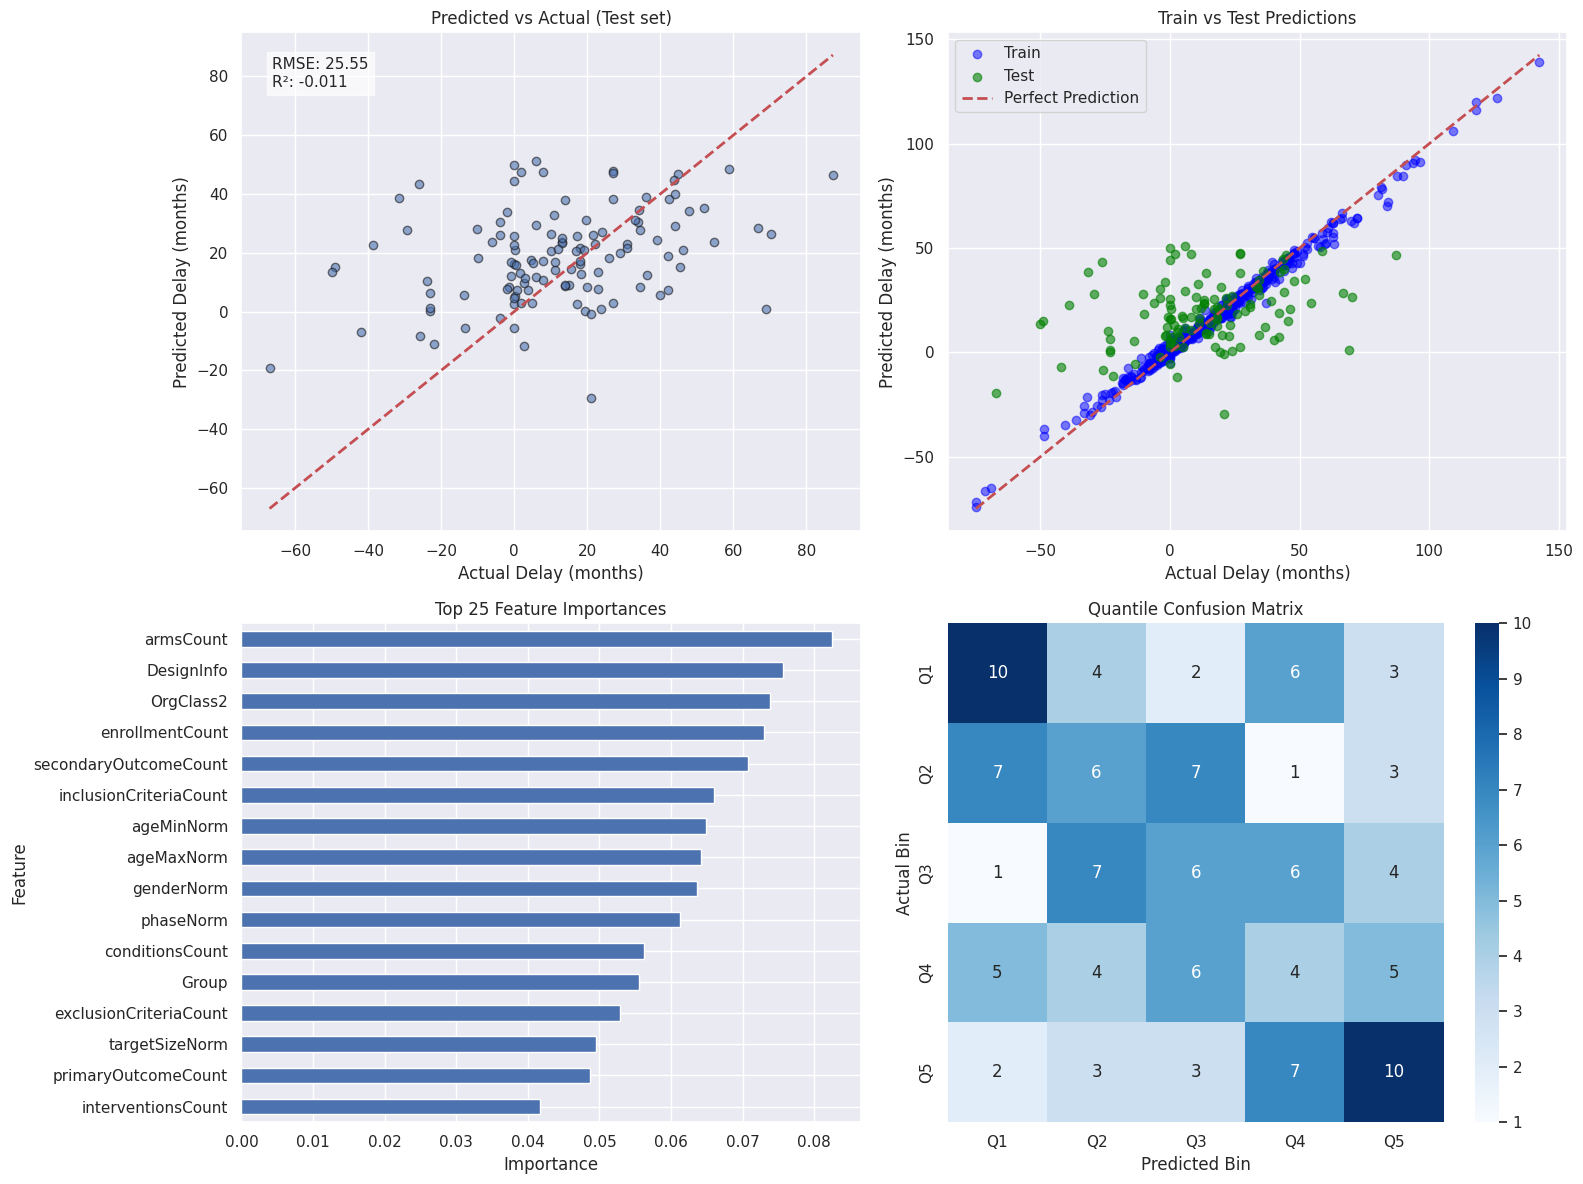


Classification Report (Quantile bins):

              precision    recall  f1-score   support

          Q1       0.40      0.40      0.40        25
          Q2       0.25      0.25      0.25        24
          Q3       0.25      0.25      0.25        24
          Q4       0.17      0.17      0.17        24
          Q5       0.40      0.40      0.40        25

    accuracy                           0.30       122
   macro avg       0.29      0.29      0.29       122
weighted avg       0.30      0.30      0.30       122



In [91]:
# -----------------------------
# Optimized XGBoost pipeline: DelayCalc
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
import xgboost as xgb

# -----------------------------
# Prepare features
# -----------------------------
# Scale numerical features
X_num = comp_trials[features_numerical].fillna(0)
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=comp_trials.index)

# Manual target encoding for categorical features
X_cat = comp_trials[features_categorical].fillna('MISSING').copy()
X_cat.index = comp_trials.index
y_reg = comp_trials['DelayCalc'].fillna(0)

for col in X_cat.columns:
    mean_map = comp_trials.groupby(col)['DelayCalc'].mean()
    X_cat[col] = X_cat[col].map(mean_map).fillna(y_reg.mean())

# Combine features
X = pd.concat([X_num_scaled, X_cat], axis=1)

# -----------------------------
# Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# -----------------------------
# XGBoost Regressor (optimized)
# -----------------------------
xgb_reg = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

# Fit model (works with any XGBoost version)
xgb_reg.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred_test = xgb_reg.predict(X_test)
y_pred_train = xgb_reg.predict(X_train)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
print(f"XGB Regression -> RMSE: {rmse:.2f} months, R²: {r2:.3f}")

# -----------------------------
# Derive quantile bins from predictions
# -----------------------------
n_classes = 5
labels_str = [f'Q{i+1}' for i in range(n_classes)]

# Use qcut for balanced bins
y_test_bins = pd.qcut(y_test, q=n_classes, labels=labels_str, duplicates='drop')
y_pred_bins = pd.qcut(y_pred_test, q=n_classes, labels=labels_str, duplicates='drop')

# -----------------------------
# Feature importance
# -----------------------------
feat_importances = pd.Series(xgb_reg.feature_importances_, index=X.columns).sort_values()

# -----------------------------
# Create 2x2 figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: Regression predicted vs actual
axes[0,0].scatter(y_test, y_pred_test, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel("Actual Delay (months)")
axes[0,0].set_ylabel("Predicted Delay (months)")
axes[0,0].set_title("Predicted vs Actual (Test set)")
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse:.2f}\nR²: {r2:.3f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=11, bbox=dict(facecolor='white', alpha=0.7))

# Top-right: Train vs Test predictions
axes[0,1].scatter(y_train, y_pred_train, alpha=0.5, color='blue', label='Train')
axes[0,1].scatter(y_test, y_pred_test, alpha=0.6, color='green', label='Test')
min_val = min(y_train.min(), y_test.min())
max_val = max(y_train.max(), y_test.max())
axes[0,1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0,1].set_xlabel("Actual Delay (months)")
axes[0,1].set_ylabel("Predicted Delay (months)")
axes[0,1].set_title("Train vs Test Predictions")
axes[0,1].legend()
axes[0,1].grid(True)

# Bottom-left: Feature importance
topn = min(25, len(feat_importances))
feat_importances.tail(topn).plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title("Top 25 Feature Importances")
axes[1,0].set_xlabel("Importance")
axes[1,0].set_ylabel("Feature")

# Bottom-right: Confusion matrix for quantile bins
cm = confusion_matrix(y_test_bins, y_pred_bins, labels=labels_str)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_str, yticklabels=labels_str, ax=axes[1,1])
axes[1,1].set_xlabel("Predicted Bin")
axes[1,1].set_ylabel("Actual Bin")
axes[1,1].set_title("Quantile Confusion Matrix")

plt.tight_layout()

# -----------------------------
# Save figure
# -----------------------------
file_name = 'XGBoost_DelayCalc_SingleModel.png'
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

# -----------------------------
# Classification report
# -----------------------------
print("\nClassification Report (Quantile bins):\n")
print(classification_report(y_test_bins, y_pred_bins, target_names=labels_str))


RF vs XGBoost

Random Forest -> RMSE: 25.48, R²: -0.006
XGBoost -> RMSE: 25.55, R²: -0.011


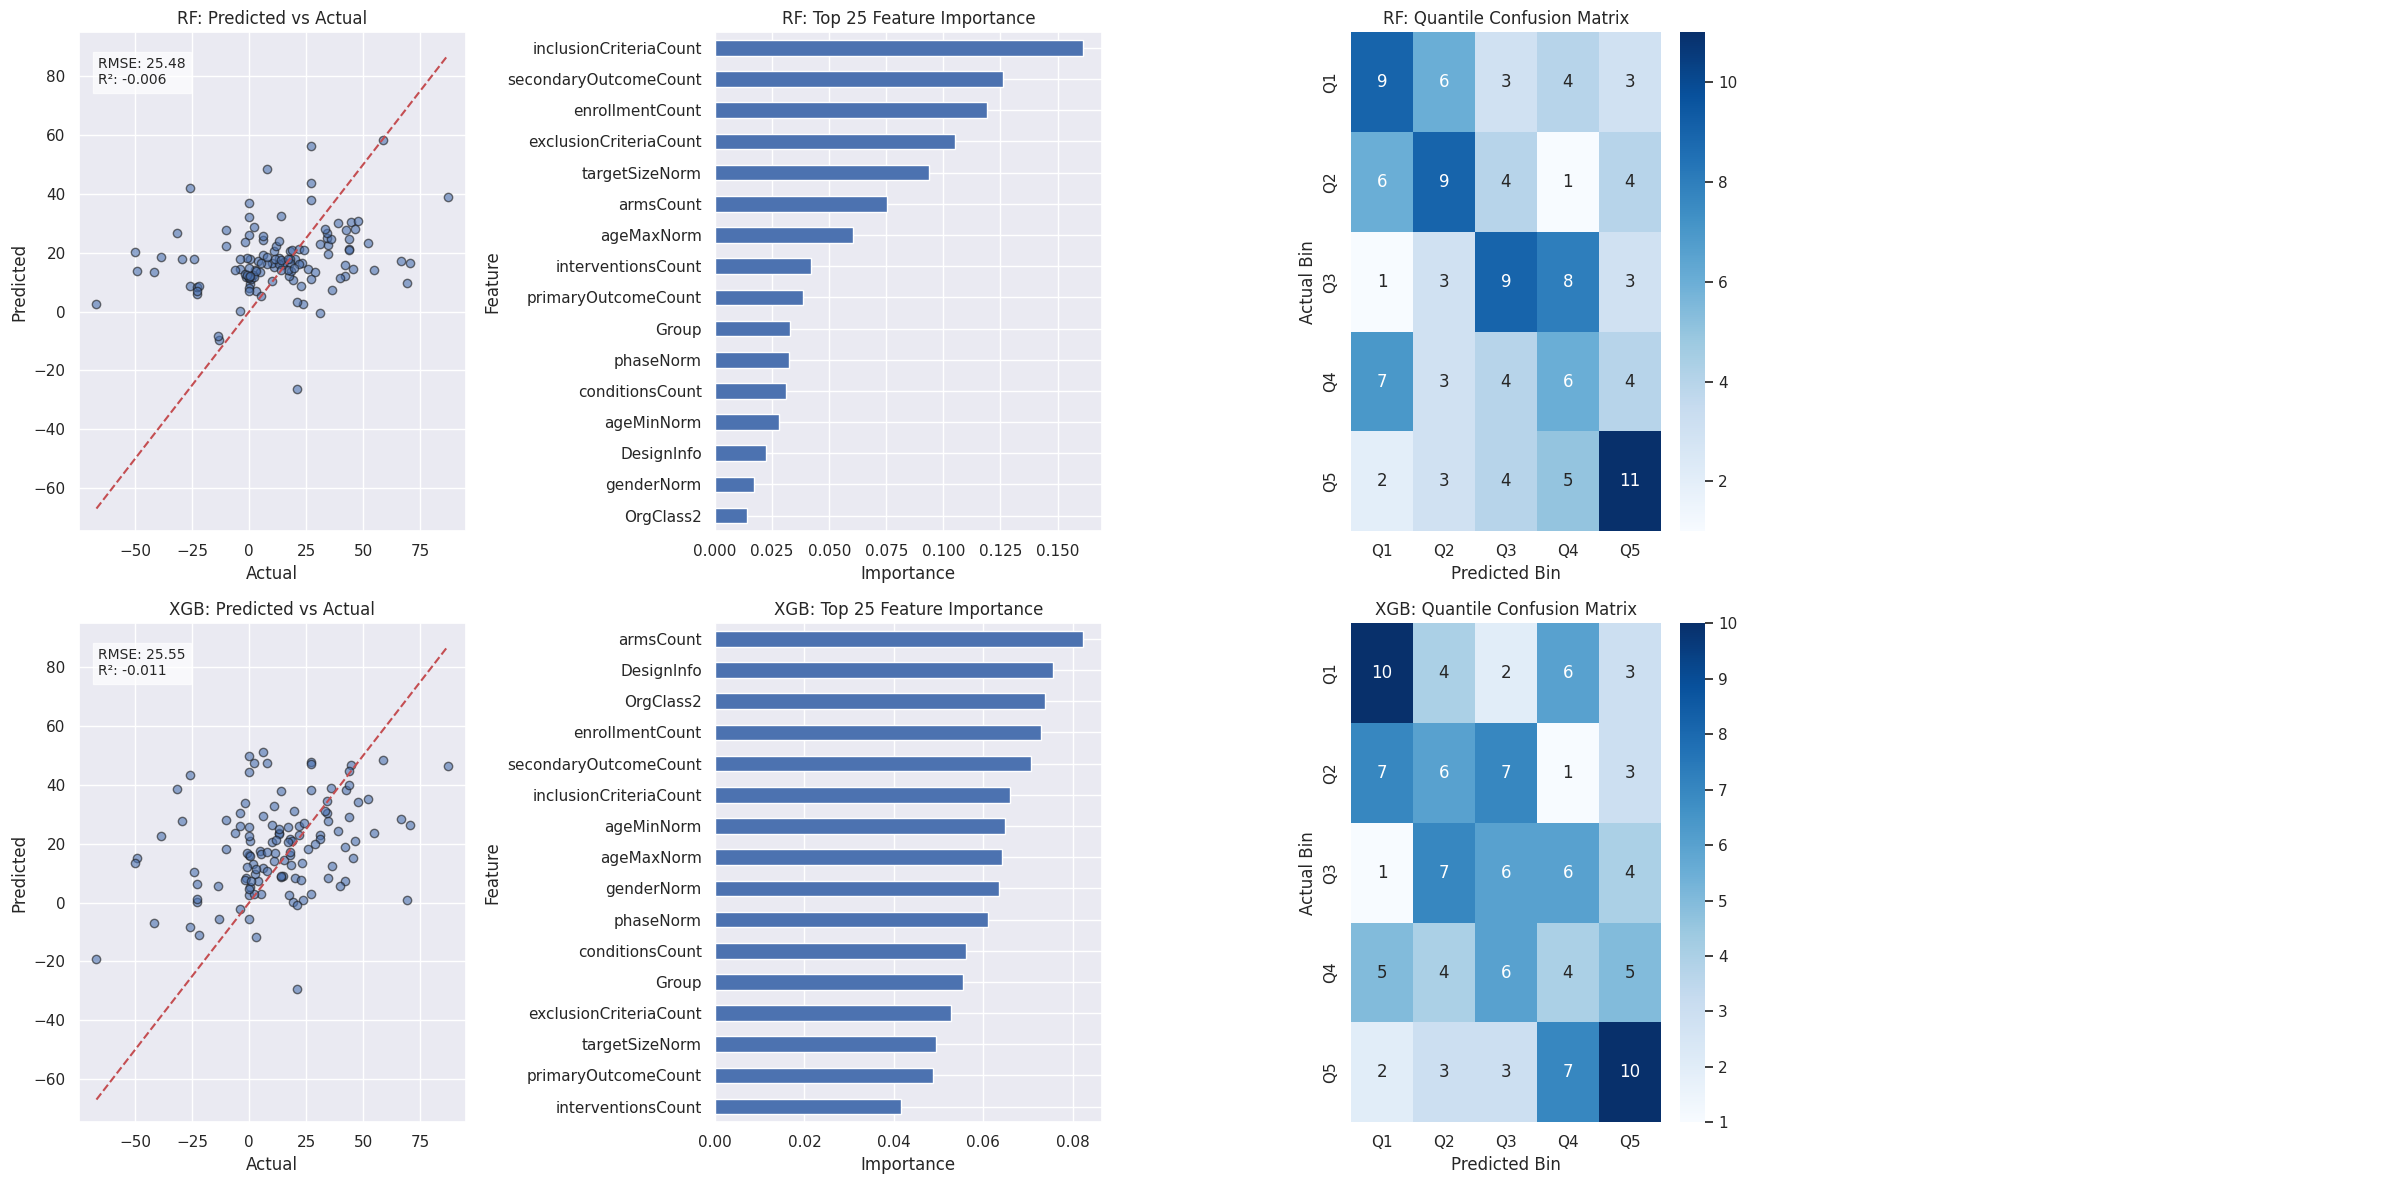

Random Forest Quantile Classification Report:

              precision    recall  f1-score   support

          Q1       0.36      0.36      0.36        25
          Q2       0.38      0.38      0.38        24
          Q3       0.38      0.38      0.38        24
          Q4       0.25      0.25      0.25        24
          Q5       0.44      0.44      0.44        25

    accuracy                           0.36       122
   macro avg       0.36      0.36      0.36       122
weighted avg       0.36      0.36      0.36       122

XGBoost Quantile Classification Report:

              precision    recall  f1-score   support

          Q1       0.40      0.40      0.40        25
          Q2       0.25      0.25      0.25        24
          Q3       0.25      0.25      0.25        24
          Q4       0.17      0.17      0.17        24
          Q5       0.40      0.40      0.40        25

    accuracy                           0.30       122
   macro avg       0.29      0.29      0.29

In [92]:
# -----------------------------
# Random Forest vs XGBoost: DelayCalc
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# -----------------------------
# Prepare features
# -----------------------------
# Scale numerical features
X_num = comp_trials[features_numerical].fillna(0)
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=comp_trials.index)

# Manual target encoding for categorical features
X_cat = comp_trials[features_categorical].fillna('MISSING').copy()
X_cat.index = comp_trials.index
y_reg = comp_trials['DelayCalc'].fillna(0)

for col in X_cat.columns:
    mean_map = comp_trials.groupby(col)['DelayCalc'].mean()
    X_cat[col] = X_cat[col].map(mean_map).fillna(y_reg.mean())

# Combine features
X = pd.concat([X_num_scaled, X_cat], axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# -----------------------------
# 1️⃣ Random Forest
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest -> RMSE: {rmse_rf:.2f}, R²: {r2_rf:.3f}")

# Feature importance
feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

# Quantile bins
n_classes = 5
labels_str = [f'Q{i+1}' for i in range(n_classes)]
y_test_bins_rf = pd.qcut(y_test, q=n_classes, labels=labels_str, duplicates='drop')
y_pred_bins_rf = pd.qcut(y_pred_rf, q=n_classes, labels=labels_str, duplicates='drop')

# -----------------------------
# 2️⃣ XGBoost
# -----------------------------
xgb_reg = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
y_pred_xgb_train = xgb_reg.predict(X_train)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost -> RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.3f}")

# Feature importance
feat_imp_xgb = pd.Series(xgb_reg.feature_importances_, index=X.columns).sort_values()

# Quantile bins
y_test_bins_xgb = pd.qcut(y_test, q=n_classes, labels=labels_str, duplicates='drop')
y_pred_bins_xgb = pd.qcut(y_pred_xgb, q=n_classes, labels=labels_str, duplicates='drop')

# -----------------------------
# 3️⃣ Plot comparison: Regression + Confusion Matrix
# -----------------------------
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# Random Forest - Regression
axes[0,0].scatter(y_test, y_pred_rf, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0,0].set_title("RF: Predicted vs Actual")
axes[0,0].set_xlabel("Actual")
axes[0,0].set_ylabel("Predicted")
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse_rf:.2f}\nR²: {r2_rf:.3f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Random Forest - Feature importance
topn = min(25, len(feat_imp_rf))
feat_imp_rf.tail(topn).plot(kind='barh', ax=axes[0,1])
axes[0,1].set_title("RF: Top 25 Feature Importance")
axes[0,1].set_xlabel("Importance")
axes[0,1].set_ylabel("Feature")

# Random Forest - Confusion matrix
cm_rf = confusion_matrix(y_test_bins_rf, y_pred_bins_rf, labels=labels_str)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels_str, yticklabels=labels_str, ax=axes[0,2])
axes[0,2].set_title("RF: Quantile Confusion Matrix")
axes[0,2].set_xlabel("Predicted Bin")
axes[0,2].set_ylabel("Actual Bin")

# Empty slot for RF
axes[0,3].axis('off')

# XGBoost - Regression
axes[1,0].scatter(y_test, y_pred_xgb, alpha=0.6, edgecolor='k')
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1,0].set_title("XGB: Predicted vs Actual")
axes[1,0].set_xlabel("Actual")
axes[1,0].set_ylabel("Predicted")
axes[1,0].text(0.05, 0.95, f"RMSE: {rmse_xgb:.2f}\nR²: {r2_xgb:.3f}", transform=axes[1,0].transAxes,
               verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# XGBoost - Feature importance
feat_imp_xgb.tail(topn).plot(kind='barh', ax=axes[1,1])
axes[1,1].set_title("XGB: Top 25 Feature Importance")
axes[1,1].set_xlabel("Importance")
axes[1,1].set_ylabel("Feature")

# XGBoost - Confusion matrix
cm_xgb = confusion_matrix(y_test_bins_xgb, y_pred_bins_xgb, labels=labels_str)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=labels_str, yticklabels=labels_str, ax=axes[1,2])
axes[1,2].set_title("XGB: Quantile Confusion Matrix")
axes[1,2].set_xlabel("Predicted Bin")
axes[1,2].set_ylabel("Actual Bin")

# Empty slot for XGB
axes[1,3].axis('off')

plt.tight_layout()
plt.show()

# -----------------------------
# Optional: Classification reports
# -----------------------------
print("Random Forest Quantile Classification Report:\n")
print(classification_report(y_test_bins_rf, y_pred_bins_rf, target_names=labels_str))

print("XGBoost Quantile Classification Report:\n")
print(classification_report(y_test_bins_xgb, y_pred_bins_xgb, target_names=labels_str))


##Conclusion of RF and XGBoost when using 'most' important features
My dataset is not big enough to be able to create a good model. My sample to feature ratio is very very low. This can cause overfitting, unstable quantile bin predictions and Low R^2 amd high RSME as noise dominates the model.

Ideally, you would have 10x the features as samples. In this case  I have 5 categorical features, and 11 numerical features. So meaning in this case it would be best to have over 1700 samples and 50-100 samples per bin.
Probably if I have a higher sample size, I would be able to use my pre-set bins, which were defined as important cut-offs for clinical trial delays.


Bigger dataset would result in higher performance, less overfitting and more stable model.

##XGBoost with less features

We will limit the features to:

features_categorical = 'phaseNorm','OrgClass2','Group'  
features_numerical =  'targetSizeNorm','enrollmentCount'

In [94]:
features_categorical_small = [
    'phaseNorm','OrgClass2','Group'
    ]

features_numerical_small =  [
    'targetSizeNorm','enrollmentCount'
    ]

In [96]:
# -----------------------------
# Feature counts summary
# -----------------------------
print("===== CATEGORICAL FEATURES COUNTS =====")
for col in features_categorical_small:
    print(f"\nFeature: {col}")
    print(comp_trials[col].value_counts(dropna=False))

print("\n===== NUMERICAL FEATURES NON-MISSING COUNTS =====")
for col in features_numerical_small:
    non_missing = comp_trials[col].notna().sum()
    total = len(comp_trials)
    print(f"{col}: {non_missing} / {total} non-missing values")

print("\n===== NUMERICAL FEATURES VALUE FREQUENCIES (OPTIONAL) =====")
for col in features_numerical_small:
    print(f"\nFeature: {col}")
    print(comp_trials[col].value_counts(dropna=False).head(10))  # top 10 frequent values


===== CATEGORICAL FEATURES COUNTS =====

Feature: phaseNorm
phaseNorm
Phase 2           316
Phase 1           165
Phase 3            77
Not Applicable     41
Phase 4            10
Name: count, dtype: int64

Feature: OrgClass2
OrgClass2
Industry        306
Non-industry    303
Name: count, dtype: int64

Feature: Group
Group
HR +        210
Triple −    202
HER2 +      197
Name: count, dtype: int64

===== NUMERICAL FEATURES NON-MISSING COUNTS =====
targetSizeNorm: 609 / 609 non-missing values
enrollmentCount: 609 / 609 non-missing values

===== NUMERICAL FEATURES VALUE FREQUENCIES (OPTIONAL) =====

Feature: targetSizeNorm
targetSizeNorm
54.0    13
30.0    11
60.0     9
40.0     9
12.0     9
24.0     8
32.0     8
50.0     8
41.0     8
80.0     8
Name: count, dtype: int64

Feature: enrollmentCount
enrollmentCount
30.0     12
54.0     12
40.0     10
60.0      9
50.0      9
80.0      8
34.0      8
20.0      8
102.0     8
12.0      8
Name: count, dtype: int64


Random Forest -> RMSE: 25.50, R²: -0.007
XGBoost -> RMSE: 26.36, R²: -0.076


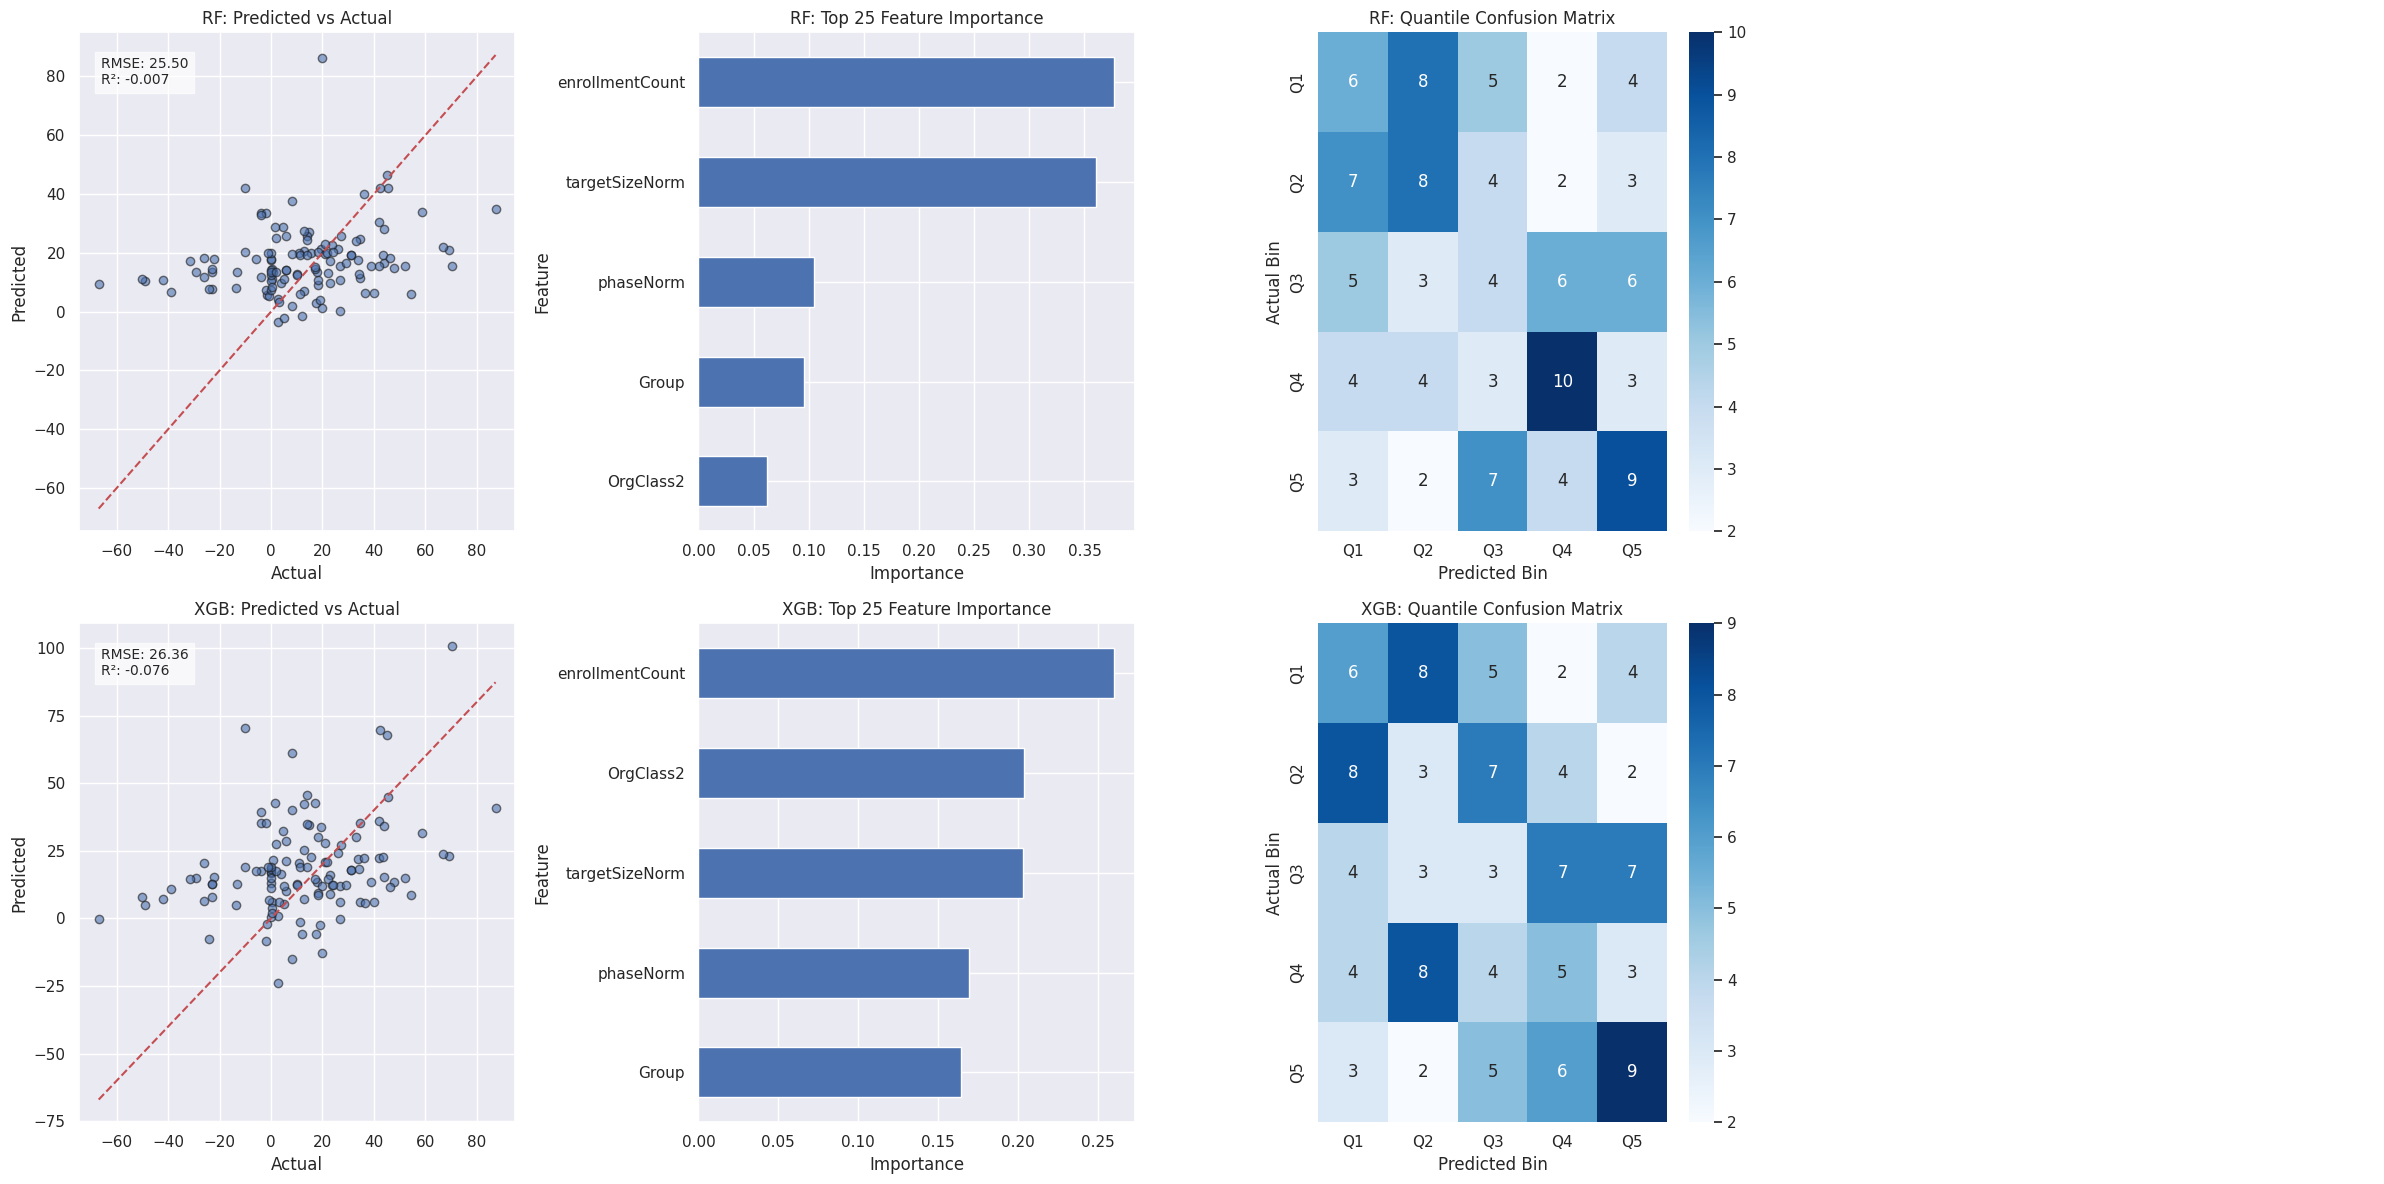

Random Forest Quantile Classification Report:

              precision    recall  f1-score   support

          Q1       0.24      0.24      0.24        25
          Q2       0.32      0.33      0.33        24
          Q3       0.17      0.17      0.17        24
          Q4       0.42      0.42      0.42        24
          Q5       0.36      0.36      0.36        25

    accuracy                           0.30       122
   macro avg       0.30      0.30      0.30       122
weighted avg       0.30      0.30      0.30       122

XGBoost Quantile Classification Report:

              precision    recall  f1-score   support

          Q1       0.24      0.24      0.24        25
          Q2       0.12      0.12      0.12        24
          Q3       0.12      0.12      0.12        24
          Q4       0.21      0.21      0.21        24
          Q5       0.36      0.36      0.36        25

    accuracy                           0.21       122
   macro avg       0.21      0.21      0.21

In [95]:
# -----------------------------
# Random Forest vs XGBoost: DelayCalc (small feature set)
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# -----------------------------
# Prepare features (small set)
# -----------------------------
# Scale numerical features
X_num = comp_trials[features_numerical_small].fillna(0)
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=comp_trials.index)

# Manual target encoding for categorical features
X_cat = comp_trials[features_categorical_small].fillna('MISSING').copy()
X_cat.index = comp_trials.index
y_reg = comp_trials['DelayCalc'].fillna(0)

for col in X_cat.columns:
    mean_map = comp_trials.groupby(col)['DelayCalc'].mean()
    X_cat[col] = X_cat[col].map(mean_map).fillna(y_reg.mean())

# Combine features
X = pd.concat([X_num_scaled, X_cat], axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# -----------------------------
# 1️⃣ Random Forest
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest -> RMSE: {rmse_rf:.2f}, R²: {r2_rf:.3f}")

# Feature importance
feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

# Quantile bins
n_classes = 5
labels_str = [f'Q{i+1}' for i in range(n_classes)]
y_test_bins_rf = pd.qcut(y_test, q=n_classes, labels=labels_str, duplicates='drop')
y_pred_bins_rf = pd.qcut(y_pred_rf, q=n_classes, labels=labels_str, duplicates='drop')

# -----------------------------
# 2️⃣ XGBoost
# -----------------------------
xgb_reg = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
y_pred_xgb_train = xgb_reg.predict(X_train)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost -> RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.3f}")

# Feature importance
feat_imp_xgb = pd.Series(xgb_reg.feature_importances_, index=X.columns).sort_values()

# Quantile bins
y_test_bins_xgb = pd.qcut(y_test, q=n_classes, labels=labels_str, duplicates='drop')
y_pred_bins_xgb = pd.qcut(y_pred_xgb, q=n_classes, labels=labels_str, duplicates='drop')

# -----------------------------
# 3️⃣ Plot comparison: Regression + Confusion Matrix
# -----------------------------
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# Random Forest - Regression
axes[0,0].scatter(y_test, y_pred_rf, alpha=0.6, edgecolor='k')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0,0].set_title("RF: Predicted vs Actual")
axes[0,0].set_xlabel("Actual")
axes[0,0].set_ylabel("Predicted")
axes[0,0].text(0.05, 0.95, f"RMSE: {rmse_rf:.2f}\nR²: {r2_rf:.3f}", transform=axes[0,0].transAxes,
               verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Random Forest - Feature importance
topn = min(25, len(feat_imp_rf))
feat_imp_rf.tail(topn).plot(kind='barh', ax=axes[0,1])
axes[0,1].set_title("RF: Top 25 Feature Importance")
axes[0,1].set_xlabel("Importance")
axes[0,1].set_ylabel("Feature")

# Random Forest - Confusion matrix
cm_rf = confusion_matrix(y_test_bins_rf, y_pred_bins_rf, labels=labels_str)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels_str, yticklabels=labels_str, ax=axes[0,2])
axes[0,2].set_title("RF: Quantile Confusion Matrix")
axes[0,2].set_xlabel("Predicted Bin")
axes[0,2].set_ylabel("Actual Bin")

# Empty slot for RF
axes[0,3].axis('off')

# XGBoost - Regression
axes[1,0].scatter(y_test, y_pred_xgb, alpha=0.6, edgecolor='k')
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1,0].set_title("XGB: Predicted vs Actual")
axes[1,0].set_xlabel("Actual")
axes[1,0].set_ylabel("Predicted")
axes[1,0].text(0.05, 0.95, f"RMSE: {rmse_xgb:.2f}\nR²: {r2_xgb:.3f}", transform=axes[1,0].transAxes,
               verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# XGBoost - Feature importance
feat_imp_xgb.tail(topn).plot(kind='barh', ax=axes[1,1])
axes[1,1].set_title("XGB: Top 25 Feature Importance")
axes[1,1].set_xlabel("Importance")
axes[1,1].set_ylabel("Feature")

# XGBoost - Confusion matrix
cm_xgb = confusion_matrix(y_test_bins_xgb, y_pred_bins_xgb, labels=labels_str)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=labels_str, yticklabels=labels_str, ax=axes[1,2])
axes[1,2].set_title("XGB: Quantile Confusion Matrix")
axes[1,2].set_xlabel("Predicted Bin")
axes[1,2].set_ylabel("Actual Bin")

# Empty slot for XGB
axes[1,3].axis('off')

plt.tight_layout()
plt.show()

# -----------------------------
# Optional: Classification reports
# -----------------------------
print("Random Forest Quantile Classification Report:\n")
print(classification_report(y_test_bins_rf, y_pred_bins_rf, target_names=labels_str))

print("XGBoost Quantile Classification Report:\n")
print(classification_report(y_test_bins_xgb, y_pred_bins_xgb, target_names=labels_str))


##Less bins  
Use only 2 bins:
- Early or On-time: delay < 3 months
- Delayed: delay > 3 months

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:01:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


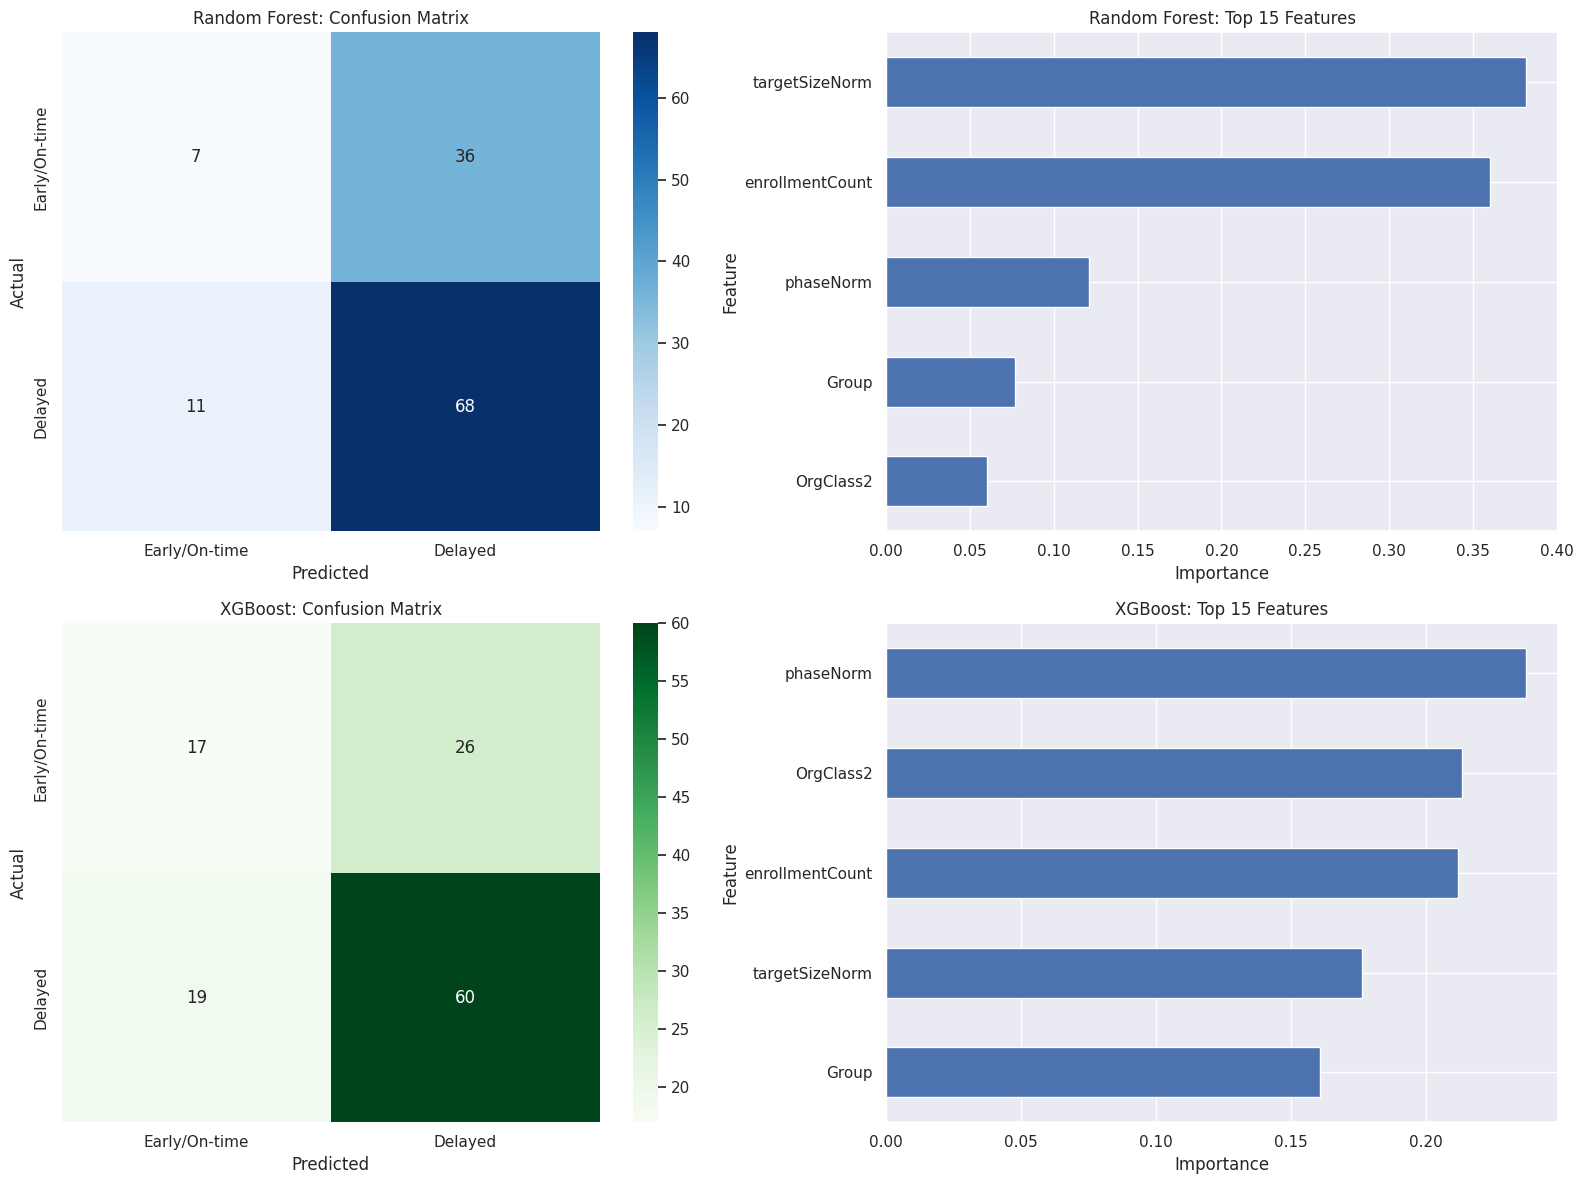

Random Forest Classification Report:

               precision    recall  f1-score   support

Early/On-time       0.39      0.16      0.23        43
      Delayed       0.65      0.86      0.74        79

     accuracy                           0.61       122
    macro avg       0.52      0.51      0.49       122
 weighted avg       0.56      0.61      0.56       122

XGBoost Classification Report:

               precision    recall  f1-score   support

Early/On-time       0.47      0.40      0.43        43
      Delayed       0.70      0.76      0.73        79

     accuracy                           0.63       122
    macro avg       0.58      0.58      0.58       122
 weighted avg       0.62      0.63      0.62       122



In [100]:
# -----------------------------
# Binary Classification: Early/On-time vs Delayed
# Random Forest vs XGBoost: DelayCalc
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# -----------------------------
# Prepare features (small set)
# -----------------------------
# Scale numerical features
X_num = comp_trials[features_numerical_small].fillna(0)
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=comp_trials.index)

# Target encoding for categorical features
X_cat = comp_trials[features_categorical_small].fillna('MISSING').copy()
X_cat.index = comp_trials.index
y_cont = comp_trials['DelayCalc'].fillna(0)

for col in X_cat.columns:
    mean_map = comp_trials.groupby(col)['DelayCalc'].mean()
    X_cat[col] = X_cat[col].map(mean_map).fillna(y_cont.mean())

# Combine features
X = pd.concat([X_num_scaled, X_cat], axis=1)

# -----------------------------
# Binary classification target
# -----------------------------
y_bin = (y_cont > 3).astype(int)  # 0 = Early/On-time, 1 = Delayed
class_names = ['Early/On-time', 'Delayed']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42, stratify=y_bin)

# -----------------------------
# Random Forest Classifier
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Feature importance
feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

# -----------------------------
# XGBoost Classifier
# -----------------------------
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Feature importance
feat_imp_xgb = pd.Series(xgb_clf.feature_importances_, index=X.columns).sort_values()

# -----------------------------
# Confusion matrices
# -----------------------------
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# -----------------------------
# Combined figure
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-left: RF confusion matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0,0])
axes[0,0].set_title("Random Forest: Confusion Matrix")
axes[0,0].set_xlabel("Predicted")
axes[0,0].set_ylabel("Actual")

# Top-right: RF feature importance (top 15)
topn = min(15, len(feat_imp_rf))
feat_imp_rf.tail(topn).plot(kind='barh', ax=axes[0,1])
axes[0,1].set_title("Random Forest: Top 15 Features")
axes[0,1].set_xlabel("Importance")
axes[0,1].set_ylabel("Feature")

# Bottom-left: XGBoost confusion matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, ax=axes[1,0])
axes[1,0].set_title("XGBoost: Confusion Matrix")
axes[1,0].set_xlabel("Predicted")
axes[1,0].set_ylabel("Actual")

# Bottom-right: XGBoost feature importance (top 15)
feat_imp_xgb.tail(topn).plot(kind='barh', ax=axes[1,1])
axes[1,1].set_title("XGBoost: Top 15 Features")
axes[1,1].set_xlabel("Importance")
axes[1,1].set_ylabel("Feature")

plt.tight_layout()
plt.show()

# -----------------------------
# Classification reports
# -----------------------------
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=class_names))


#Classification

## Test for desicion tree


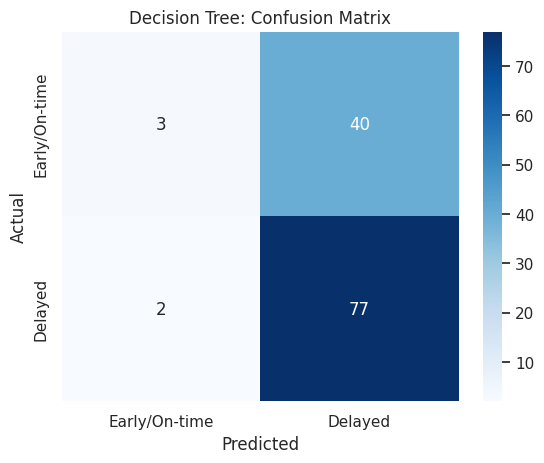

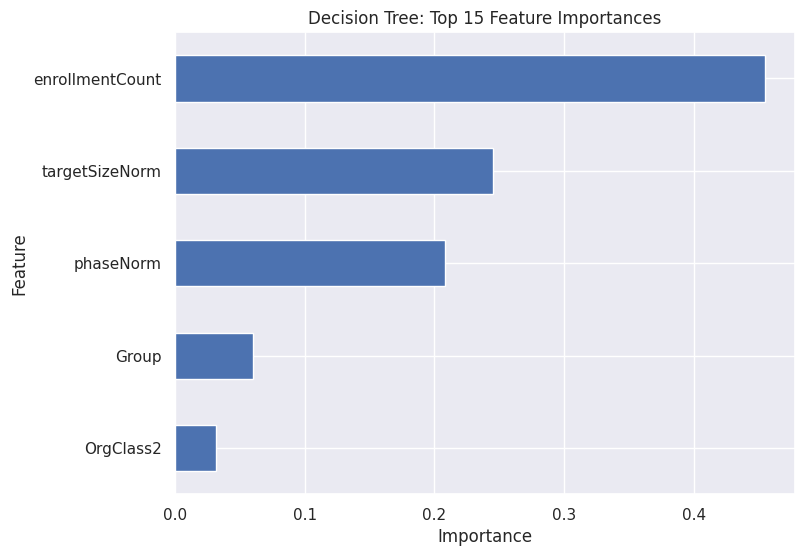

Decision Tree Classification Report:

               precision    recall  f1-score   support

Early/On-time       0.60      0.07      0.12        43
      Delayed       0.66      0.97      0.79        79

     accuracy                           0.66       122
    macro avg       0.63      0.52      0.46       122
 weighted avg       0.64      0.66      0.55       122



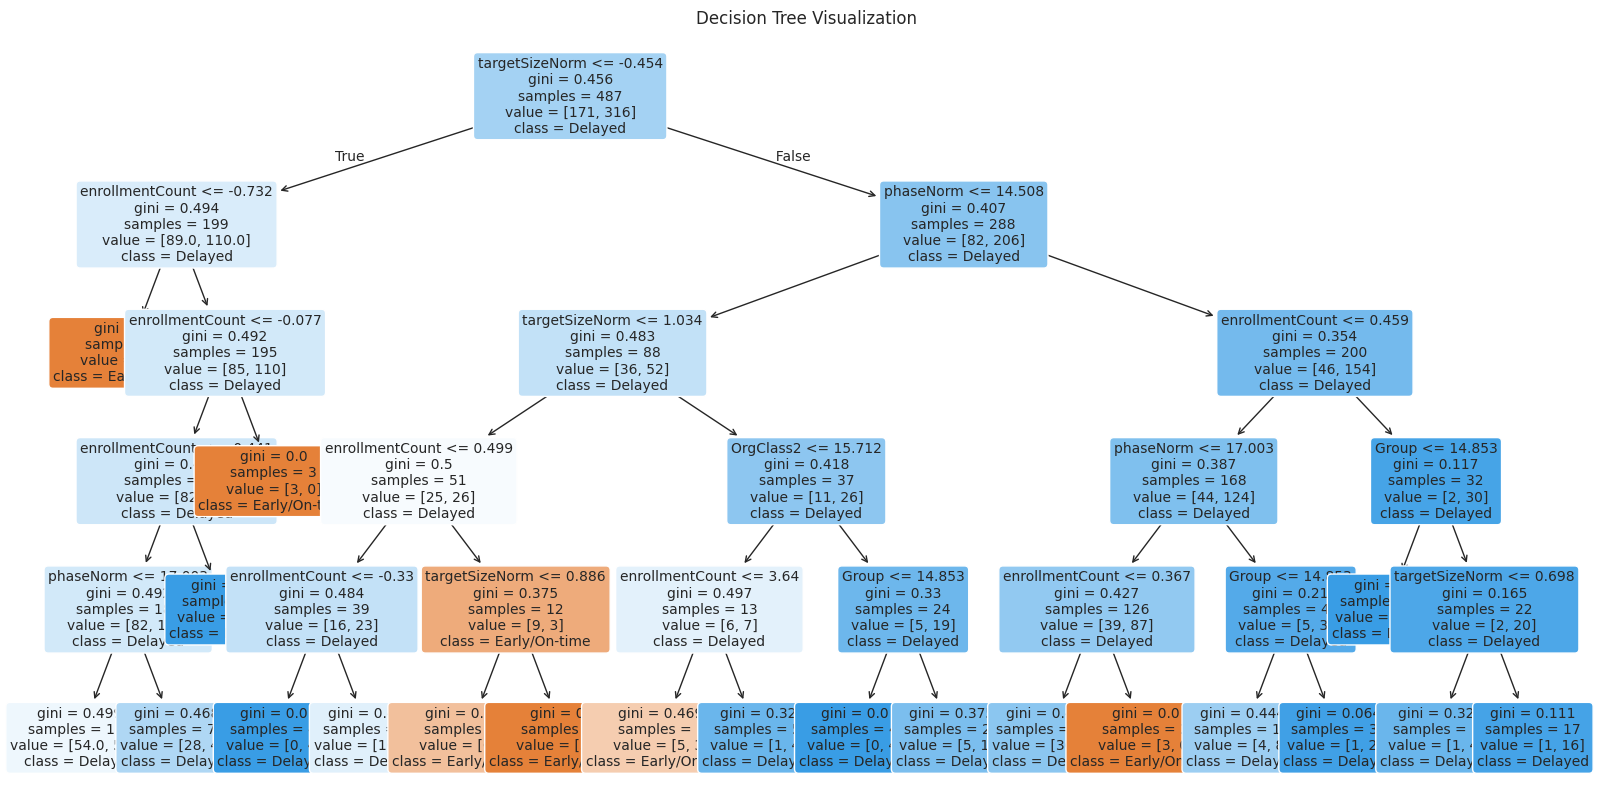

In [101]:
# -----------------------------
# Decision Tree: Binary Classification
# Early/On-time vs Delayed
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------
# Prepare features (small set)
# -----------------------------
# Scale numerical features
X_num = comp_trials[features_numerical_small].fillna(0)
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns, index=comp_trials.index)

# Target encoding for categorical features
X_cat = comp_trials[features_categorical_small].fillna('MISSING').copy()
X_cat.index = comp_trials.index
y_cont = comp_trials['DelayCalc'].fillna(0)

for col in X_cat.columns:
    mean_map = comp_trials.groupby(col)['DelayCalc'].mean()
    X_cat[col] = X_cat[col].map(mean_map).fillna(y_cont.mean())

# Combine features
X = pd.concat([X_num_scaled, X_cat], axis=1)

# -----------------------------
# Binary target: Early/On-time vs Delayed
# -----------------------------
y_bin = (y_cont > 3).astype(int)  # 0 = Early/On-time, 1 = Delayed
class_names = ['Early/On-time', 'Delayed']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

# -----------------------------
# Decision Tree Classifier
# -----------------------------
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# -----------------------------
# Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Decision Tree: Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Feature importance
# -----------------------------
feat_imp_dt = pd.Series(dt.feature_importances_, index=X.columns).sort_values()
topn = min(15, len(feat_imp_dt))
feat_imp_dt.tail(topn).plot(kind='barh', figsize=(8,6))
plt.title("Decision Tree: Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# -----------------------------
# Classification Report
# -----------------------------
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# -----------------------------
# Optional: Visualize the Decision Tree
# -----------------------------
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


#Clustering


##Kmeans

This would be nice to see groups of trials which have a similar characteristics. This could be helpful if I want to identify specific set of trials with a higher delay.

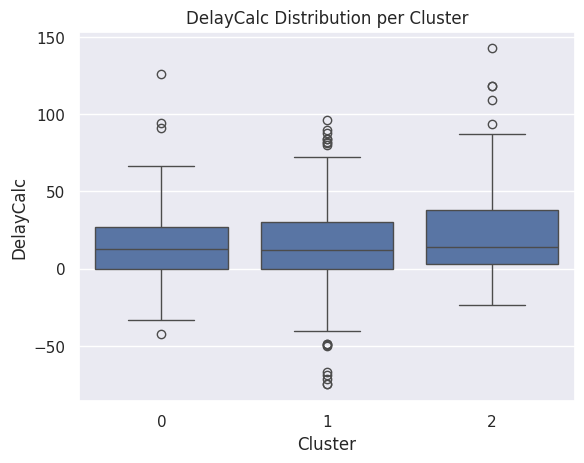

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare features (numerical + categorical encoded as target mean)
X_num = comp_trials[features_numerical_small].fillna(0)
X_cat = comp_trials[features_categorical_small].fillna('MISSING').copy()

# Target encoding for categorical features (optional)
y_cont = comp_trials['DelayCalc'].fillna(0)
for col in X_cat.columns:
    mean_map = comp_trials.groupby(col)['DelayCalc'].mean()
    X_cat[col] = X_cat[col].map(mean_map).fillna(y_cont.mean())

# Combine features and scale
X = pd.concat([X_num, X_cat], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
comp_trials['Cluster'] = clusters

# Plot cluster distribution by DelayCalc
sns.boxplot(x='Cluster', y='DelayCalc', data=comp_trials)
plt.title("DelayCalc Distribution per Cluster")
plt.show()


## Hierarchical Clustering
Shows how identical each trial is. In this method, I do not have to pre-specify how many clusters I want.  
It can explore nested patterns, relationships between trials and unknown cluster number.

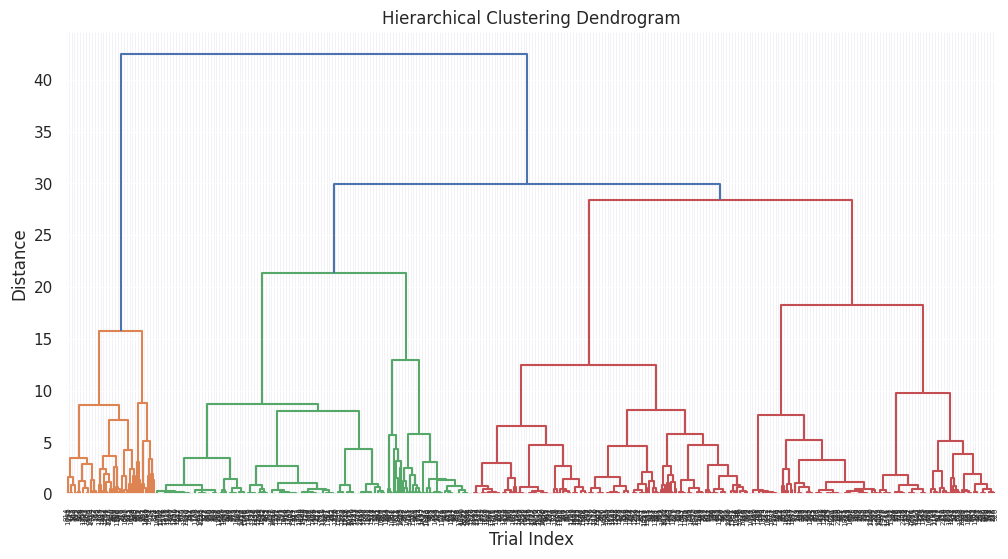

In [104]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=comp_trials.index.tolist(), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Trial Index")
plt.ylabel("Distance")
plt.show()


## TSNE-plots
It can visualize complex patterns.
It can explore patterns and can detect clusters or anomalities visually.

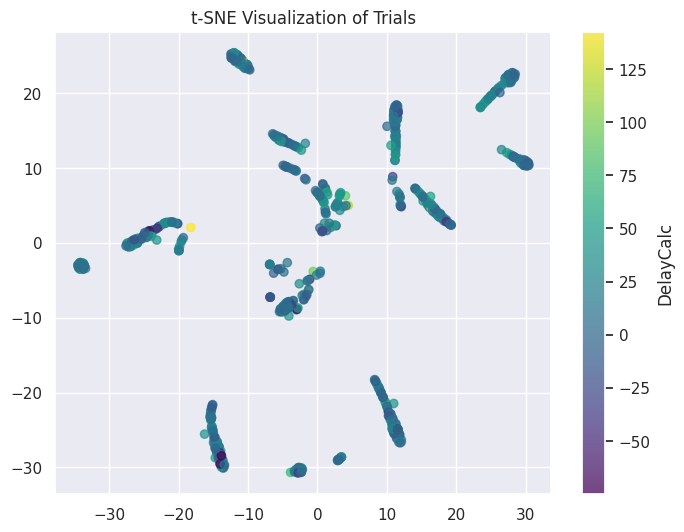

In [105]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_cont, cmap='viridis', alpha=0.7)
plt.colorbar(label='DelayCalc')
plt.title("t-SNE Visualization of Trials")
plt.show()
